# ⚫ **Needed Libaries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.ticker as mtick
# %pip install plotly
import plotly.express as px

colors=['#183a5a'	,'#efb758'	,'#c34129'	,'#e76666'	,'#f0d582','#e5a478','#616265','#5e4e4e']
sns.set_style("ticks")
import matplotlib.pyplot as plt


# ⚫ **Uploading Data**

In [ ]:
#https://drive.google.com/file/d/1CEI2GOowicDHukjrUWs_sk4Eb6UjCJUQ/view?usp=sharing
!gdown --id 1CEI2GOowicDHukjrUWs_sk4Eb6UjCJUQ

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CEI2GOowicDHukjrUWs_sk4Eb6UjCJUQ
To: /content/wfp_food_prices_egy.csv
100% 198k/198k [00:00<00:00, 74.8MB/s]


In [ ]:
#df=pd.read_csv('Egypt_Food_Prices.csv')
df=pd.read_csv('wfp_food_prices_egy.csv')

In [ ]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,8/15/2010,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Potatoes,KG,actual,Retail,EGP,1.81,0.3178
2,8/15/2010,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Rice,KG,actual,Retail,EGP,3.98,0.6992
3,8/15/2010,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Wheat flour,KG,actual,Retail,EGP,3.44,0.6044
4,8/15/2010,NaN,NaN,National Average,NaN,NaN,miscellaneous food,Sugar,KG,actual,Retail,EGP,4.28,0.7524


#⚫**Data preprocessing**

In [ ]:
# drop the first row
df=df.drop(0).reset_index(drop=True)

#convert  date to datetime format
df['date']=pd.to_datetime(df['date'])

# convert price to float
df['price']=df['price'].astype(float)
df['usdprice']=df['usdprice'].astype(float)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2058 non-null   datetime64[ns]
 1   admin1     0 non-null      object        
 2   admin2     0 non-null      object        
 3   market     2058 non-null   object        
 4   latitude   0 non-null      object        
 5   longitude  0 non-null      object        
 6   category   2058 non-null   object        
 7   commodity  2058 non-null   object        
 8   unit       2058 non-null   object        
 9   priceflag  2058 non-null   object        
 10  pricetype  2058 non-null   object        
 11  currency   2058 non-null   object        
 12  price      2058 non-null   float64       
 13  usdprice   2058 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 225.2+ KB


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="output.html")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# drop un needed columns
df.drop( ['admin1','admin2','market','latitude','longitude','priceflag','pricetype','pricetype','currency'],axis=1,inplace=True)


In [ ]:
# rename price column
df.rename(columns={'price':'EGP_price'},inplace=True)
df.rename(columns={'usdprice':'USD_price'},inplace=True)

# rename food column
df.rename(columns={'category':'food_category'},inplace=True)
df.rename(columns={'commodity':'food_name'},inplace=True)


In [ ]:
# creeate a new column for year
df['year']=df['date'].dt.year

In [ ]:
df.tail()

,date,food_category,food_name,unit,EGP_price,USD_price,year
2053,2022-10-15,oil and fats,Oil (maize),800 G,47.97,2.4586,2022
2054,2022-10-15,oil and fats,Oil (mixed),800 G,30.05,1.5402,2022
2055,2022-10-15,oil and fats,Oil (sunflower),800 G,41.59,2.1316,2022
2056,2022-10-15,pulses and nuts,"Beans (fava, dry)",KG,27.48,1.4085,2022
2057,2022-10-15,vegetables and fruits,Garlic,KG,19.61,1.0051,2022


In [ ]:
df.columns

Index(['date', 'food_category', 'food_name', 'unit', 'EGP_price', 'USD_price',
       'year'],
      dtype='object')

In [ ]:
df.dtypes

date             datetime64[ns]
food_category            object
food_name                object
unit                     object
EGP_price               float64
USD_price               float64
year                      int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2058 non-null   datetime64[ns]
 1   food_category  2058 non-null   object        
 2   food_name      2058 non-null   object        
 3   unit           2058 non-null   object        
 4   EGP_price      2058 non-null   float64       
 5   USD_price      2058 non-null   float64       
 6   year           2058 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 112.7+ KB


In [ ]:
# print and plot food name in each category
for i in df['food_category'].unique():
    print('food_category: ',i)
    print('food_name: ',df[df['food_category']==i]['food_name'].unique())
    print('--------------------------------------') 
    


food_category:  cereals and tubers
food_name:  ['Potatoes' 'Rice' 'Wheat flour' 'Pasta']
--------------------------------------
food_category:  miscellaneous food
food_name:  ['Sugar']
--------------------------------------
food_category:  oil and fats
food_name:  ['Ghee (artificial)' 'Ghee (natural)' 'Oil (maize)' 'Oil (sunflower)'
 'Oil (mixed)']
--------------------------------------
food_category:  pulses and nuts
food_name:  ['Beans (fava, dry)' 'Lentils']
--------------------------------------
food_category:  vegetables and fruits
food_name:  ['Garlic' 'Tomatoes' 'Onions (red)' 'Onions (white)']
--------------------------------------
food_category:  meat, fish and eggs
food_name:  ['Meat (beef)' 'Meat (chicken, frozen)' 'Eggs' 'Fish (tilapia)'
 'Meat (beef, without bones)']
--------------------------------------
food_category:  milk and dairy
food_name:  ['Cheese' 'Cheese (picon)' 'Milk']
--------------------------------------


In [ ]:
food_names=["Pasta","Ghee (natural)","Tomatoes","Potatoes","Lentils","Beans (fava, dry)","Garlic","Meat (chicken, frozen)","Wheat flour"
,"Sugar","Rice","Oil (maize)","Onions (red)","Eggs","Oil (sunflower)","Meat (beef, without bones)","Cheese (picon)","Cheese",
"Oil (mixed)","Onions (white)","Meat (beef)","Ghee (artificial)","Fish (tilapia)","Milk"]

**Create DataFrame For food Categories Price During Years from 2010-2022**
With:

*   Max price during 12 Months
*   Min price during 12 Months
*   Average price during 12 Months



In [ ]:
df

,date,food_category,food_name,unit,EGP_price,USD_price,year
0,2010-08-15,cereals and tubers,Potatoes,KG,1.81,0.3178,2010
1,2010-08-15,cereals and tubers,Rice,KG,3.98,0.6992,2010
2,2010-08-15,cereals and tubers,Wheat flour,KG,3.44,0.6044,2010
3,2010-08-15,miscellaneous food,Sugar,KG,4.28,0.7524,2010
4,2010-08-15,oil and fats,Ghee (artificial),KG,9.82,1.7263,2010
...,...,...,...,...,...,...,...
2053,2022-10-15,oil and fats,Oil (maize),800 G,47.97,2.4586,2022
2054,2022-10-15,oil and fats,Oil (mixed),800 G,30.05,1.5402,2022
2055,2022-10-15,oil and fats,Oil (sunflower),800 G,41.59,2.1316,2022
2056,2022-10-15,pulses and nuts,"Beans (fava, dry)",KG,27.48,1.4085,2022


In [ ]:
mon_sum=df

In [ ]:
mon_sum = mon_sum.groupby(['date', 'food_category']).agg({'EGP_price': ['sum',]})
mon_sum.columns = ['sum']
mon_sum = mon_sum.reset_index()

In [ ]:
mon_sum['year']=mon_sum['date'].dt.year

In [ ]:
#convert  date to datetime format
mon_sum.head(30)

,date,food_category,sum,year
0,2010-08-15,cereals and tubers,9.23,2010
1,2010-08-15,miscellaneous food,4.28,2010
2,2010-08-15,oil and fats,52.00,2010
3,2010-08-15,pulses and nuts,5.76,2010
4,2010-08-15,vegetables and fruits,13.46,2010
5,2010-09-15,cereals and tubers,9.98,2010
6,2010-09-15,miscellaneous food,4.38,2010
7,2010-09-15,oil and fats,18.66,2010
8,2010-09-15,pulses and nuts,5.95,2010
9,2010-09-15,vegetables and fruits,15.47,2010


In [ ]:
df_years = mon_sum.groupby(['year', 'food_category']).agg({'sum': ['mean', 'min', 'max']})
df_years.columns = ['price_mean', 'price_min', 'price_max']
df_years = df_years.reset_index()
df_years.head(40) 

,year,food_category,price_mean,price_min,price_max
0,2010,cereals and tubers,10.688000,9.23,14.41
1,2010,"meat, fish and eggs",70.173333,68.62,71.52
2,2010,miscellaneous food,4.860000,4.28,6.19
3,2010,oil and fats,32.682000,18.66,54.07
4,2010,pulses and nuts,6.302000,5.76,6.90
5,2010,vegetables and fruits,15.040000,13.01,20.16
6,2011,cereals and tubers,11.540000,9.41,16.90
7,2011,"meat, fish and eggs",69.302222,66.33,73.90
8,2011,miscellaneous food,5.591667,4.98,6.30
9,2011,oil and fats,53.735833,12.30,65.60


In [ ]:
df_years.loc[25,"price_min"]=61.965000
df_years.loc[31,"price_min"]=67.279091
df_years.loc[19,"price_min"]=42.451667

In [ ]:
df_years.head(40)

,year,food_category,price_mean,price_min,price_max
0,2010,cereals and tubers,10.688000,9.230000,14.41
1,2010,"meat, fish and eggs",70.173333,68.620000,71.52
2,2010,miscellaneous food,4.860000,4.280000,6.19
3,2010,oil and fats,32.682000,18.660000,54.07
4,2010,pulses and nuts,6.302000,5.760000,6.90
5,2010,vegetables and fruits,15.040000,13.010000,20.16
6,2011,cereals and tubers,11.540000,9.410000,16.90
7,2011,"meat, fish and eggs",69.302222,66.330000,73.90
8,2011,miscellaneous food,5.591667,4.980000,6.30
9,2011,oil and fats,53.735833,12.300000,65.60


add price change column


In [ ]:
# add price change column
df_years['price_change'] = df_years['price_mean'].diff(periods=6)
df_years.head(40)

,year,food_category,price_mean,price_min,price_max,price_change
0,2010,cereals and tubers,10.688000,9.230000,14.41,NaN
1,2010,"meat, fish and eggs",70.173333,68.620000,71.52,NaN
2,2010,miscellaneous food,4.860000,4.280000,6.19,NaN
3,2010,oil and fats,32.682000,18.660000,54.07,NaN
4,2010,pulses and nuts,6.302000,5.760000,6.90,NaN
5,2010,vegetables and fruits,15.040000,13.010000,20.16,NaN
6,2011,cereals and tubers,11.540000,9.410000,16.90,0.852000
7,2011,"meat, fish and eggs",69.302222,66.330000,73.90,-0.871111
8,2011,miscellaneous food,5.591667,4.980000,6.30,0.731667
9,2011,oil and fats,53.735833,12.300000,65.60,21.053833


In [ ]:
df_years.tail(30)

,year,food_category,price_mean,price_min,price_max,price_change
56,2018,pulses and nuts,23.672500,17.75,48.39,-8.565000
57,2018,vegetables and fruits,22.356667,13.00,33.00,-3.301667
58,2019,cereals and tubers,27.502500,24.36,35.02,-140.740833
59,2019,"meat, fish and eggs",166.144167,149.81,184.74,131.282500
60,2019,milk and dairy,36.218333,35.72,36.76,22.209167
61,2019,miscellaneous food,14.032500,14.00,14.11,-111.844167
62,2019,oil and fats,132.900000,71.26,179.96,109.227500
63,2019,pulses and nuts,32.065000,27.07,48.81,9.708333
64,2019,vegetables and fruits,22.088333,16.53,36.60,-5.414167
65,2020,cereals and tubers,27.963333,24.37,33.50,-138.180833


In [ ]:
df=df.reset_index(drop=True)
df.head()

,date,food_category,food_name,unit,EGP_price,USD_price,year
0,2010-08-15,cereals and tubers,Potatoes,KG,1.81,0.3178,2010
1,2010-08-15,cereals and tubers,Rice,KG,3.98,0.6992,2010
2,2010-08-15,cereals and tubers,Wheat flour,KG,3.44,0.6044,2010
3,2010-08-15,miscellaneous food,Sugar,KG,4.28,0.7524,2010
4,2010-08-15,oil and fats,Ghee (artificial),KG,9.82,1.7263,2010


# ⚫ **Preface**

**Food Prices Analysis is one of the most important Factors affecting the country's economy and growth and it's also a daily requirement for all consumers of the Egyptian market. With average Egyptian retail prices, we address the prices of vegetables and fruits, poultry prices of all types, municipal red meat prices, and frozen or imported meat prices, including all groceries products at today's price from 2010 to 2022 to Focus on How the prices is changing everyday and anlalyze each product price evolution every month**

**↪The data set includes information about:**

**From 15/l8/2010 Up To 15/9/2022**
- prices for cereals and tubers(Pasta,Potatoes,Rice,Wheat flour).
- prices for meat, fish and eggs.
- prices for miscellaneous food like Sugar
- prices for oil and fats(Ghee artificial and Ghee natural,Wheat flour)
- prices for pulses and nuts Like Beans(fava, dry),Lentils
- prices for Vegtables and Fruits Like Garlic, Onions (red and white), Tomatoes

**So, in this Exploratory Data Analysis section the data will be analyzed by summarizing its main Points With Extracting Important Insights , using statistical graphics and other data visualization methods. As such the reader will be familiar with what the data can tell.**

# ⚫ **Creating plotting functions**

## 1. Plot Line Chart

In [ ]:
# create function to plot line plot for each food name in given category in subplots
def plot_linechart_foodName_in_category(df,category):
    sns.set(font_scale=1.4)
    sns.set_style("ticks")
    plt.figure(figsize=(20,20),dpi=150)  

    for i,key in enumerate(df[df['food_category']==category]['food_name'].unique()):
        
        ax=plt.subplot(3,2,i+1)
        ax = sns.lineplot(x='date', y='EGP_price', data=df[df['food_name']==key],color=colors[i])
        ax.set_title(key,fontsize=15)
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1f LE '))
        plt.xticks(rotation=45)

        # plt.plot(df[df['food_name']==i]['date'],df[df['food_name']==i]['EGP_price'],label=i)
    plt.suptitle(f'{category} price line plot',fontsize=35)
    plt.show()

## 2. Plot Regplot Chart

In [ ]:
# create function to plot regplot for mean price of given category
def plot_regplot(df,category):
    sns.set(font_scale=1.4)
    sns.set_style("ticks")
    plt.figure(figsize=(12, 6))

    ax =sns.regplot(x="year", y="sum",data=mon_sum[mon_sum['food_category']==category], color=colors[0], marker='+', 
                    scatter_kws={'s': 300})
    ax.set(xlabel='Year', ylabel=f'Total Price of {category}')
    ax.set_title(f'Total Price of {category} from 2010 - 2022')
    plt.show()

    plt.show()

## 3. Plot Bar Chart with **Mean Price**

In [ ]:
# plot bar chart for mean price of given category
def plot_bar_mean_price(df,category):
    sns.set(font_scale=1)
    sns.set_style("ticks")
    plt.figure(figsize=(8,4),dpi=120)
    sns.barplot(x="year", y=df_years[df_years['food_category']==category]['price_mean'],
                data=df_years,palette=colors)   
    plt.title(f'{category} price mean bar plot')
    plt.show()


## 4. Plot Bar Chart with **Min and Max price**

In [ ]:
# plot bar chart with max and min price of given category
def plot_bar_min_max_price(df,category):
    sns.set(font_scale=1)
    sns.set_style("ticks")
    plt.figure(figsize=(8,4),dpi=120)

    sns.barplot(x=df_years['year'],y=df_years[df_years['food_category']==category]['price_max'],
    color='#000C66',label='Max price').set(ylabel=None,title=f'Max and  Min Month of Total Prices Of {category}in Each Year')

    sns.barplot(x=df_years['year'],y=df_years[df_years['food_category']==category]['price_min'],
                color='#F8AFA6',label='Min price').set(ylabel=None)
                
    plt.title(f'{category} price max and min bar plot')
    plt.legend()
    plt.show()


In [ ]:
df_temp=df_years[df_years['food_category']=='cereals and tubers']
df_temp['price_change']=df_temp['price_mean'].diff()
df_temp

<ipython-input-273-9b6fc6cc895e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,food_category,price_mean,price_min,price_max,price_change
0,2010,cereals and tubers,10.688000,9.23,14.41,NaN
6,2011,cereals and tubers,11.540000,9.41,16.90,0.852000
12,2012,cereals and tubers,12.007500,7.40,16.25,0.467500
18,2013,cereals and tubers,13.807500,11.32,18.44,1.800000
24,2014,cereals and tubers,13.008333,10.90,16.22,-0.799167
30,2015,cereals and tubers,13.406364,10.20,15.79,0.398030
37,2016,cereals and tubers,17.670833,15.04,20.82,4.264470
44,2017,cereals and tubers,22.380833,18.73,28.32,4.710000
51,2018,cereals and tubers,25.658333,18.98,35.09,3.277500
58,2019,cereals and tubers,27.502500,24.36,35.02,1.844167


## 5. Plot Bar Chart With **Price Change**

In [ ]:
# plot bar chart with price change of given category
def plot_bar_price_change(df,category):
    
    sns.set(font_scale=1)
    sns.set_style("ticks")
    plt.figure(figsize=(8,4),dpi=120)
    df_temp=df_years[df_years['food_category']==category]
    df_temp['price_change']=df_temp['price_mean'].diff()
    sns.barplot(x=df_temp["year"],y=df_temp['price_change']).set(ylabel=None,title=f'Price Change of {category} in Each Year')

## 6. Plot Time Series Chart With **Average price for category**

In [ ]:
# Basic Range Slider and Range Selectors
import plotly.graph_objects as go

# convert to function
def plot_time_series_general_category(df,category):
    fig = go.Figure()
    temp_df = df[df['food_category']==category]
    temp_df = temp_df.groupby('date',as_index=False).mean()

    fig.add_trace(
        go.Scatter(x=temp_df.date, y=temp_df.EGP_price))

    # Set title
    fig.update_layout(
        title_text=f"Time series with average price for {category}"
    )
    # add chart for each food name

    # Add range slider
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6m",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="YTD",
                         step="year",
                         stepmode="todate"),
                    dict(count=1,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        )
    )

    fig.show()


## 7. Plot Time Series Chart for each **Food Name in category**

In [ ]:
# Basic Range Slider and Range Selectors for each food name in category

import plotly.graph_objects as go

# convert to function
def plot_time_series_food_name(df,category):
    # Basic Range Slider and Range Selectors

    fig = go.Figure()
    temp_df = df[df['food_category']==category]#[200:-1]#['price_change']

    for food_name in temp_df.food_name.unique():
        # plot line chart for each food name
        fig.add_trace(
        go.Scatter(x=temp_df[temp_df['food_name']==food_name]['date'], y=temp_df[temp_df['food_name']==food_name]['EGP_price'] ,name=food_name, mode='lines',))

    # Set title
    fig.update_layout(
        title_text=f"Time series with price for all food name in {category}")

    # Add range slider
    fig.update_layout( 
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                        label="1m",
                        step="month",
                        stepmode="backward"),
                    dict(count=6,
                        label="6m",
                        step="month",
                        stepmode="backward"),
                    dict(count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate"),
                    dict(count=1,
                        label="1y",
                        step="year",
                        stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        )
    )

    fig.show()


# 🍚 **Cereals and Tubers**

## 1. plot line chart for all food names in category

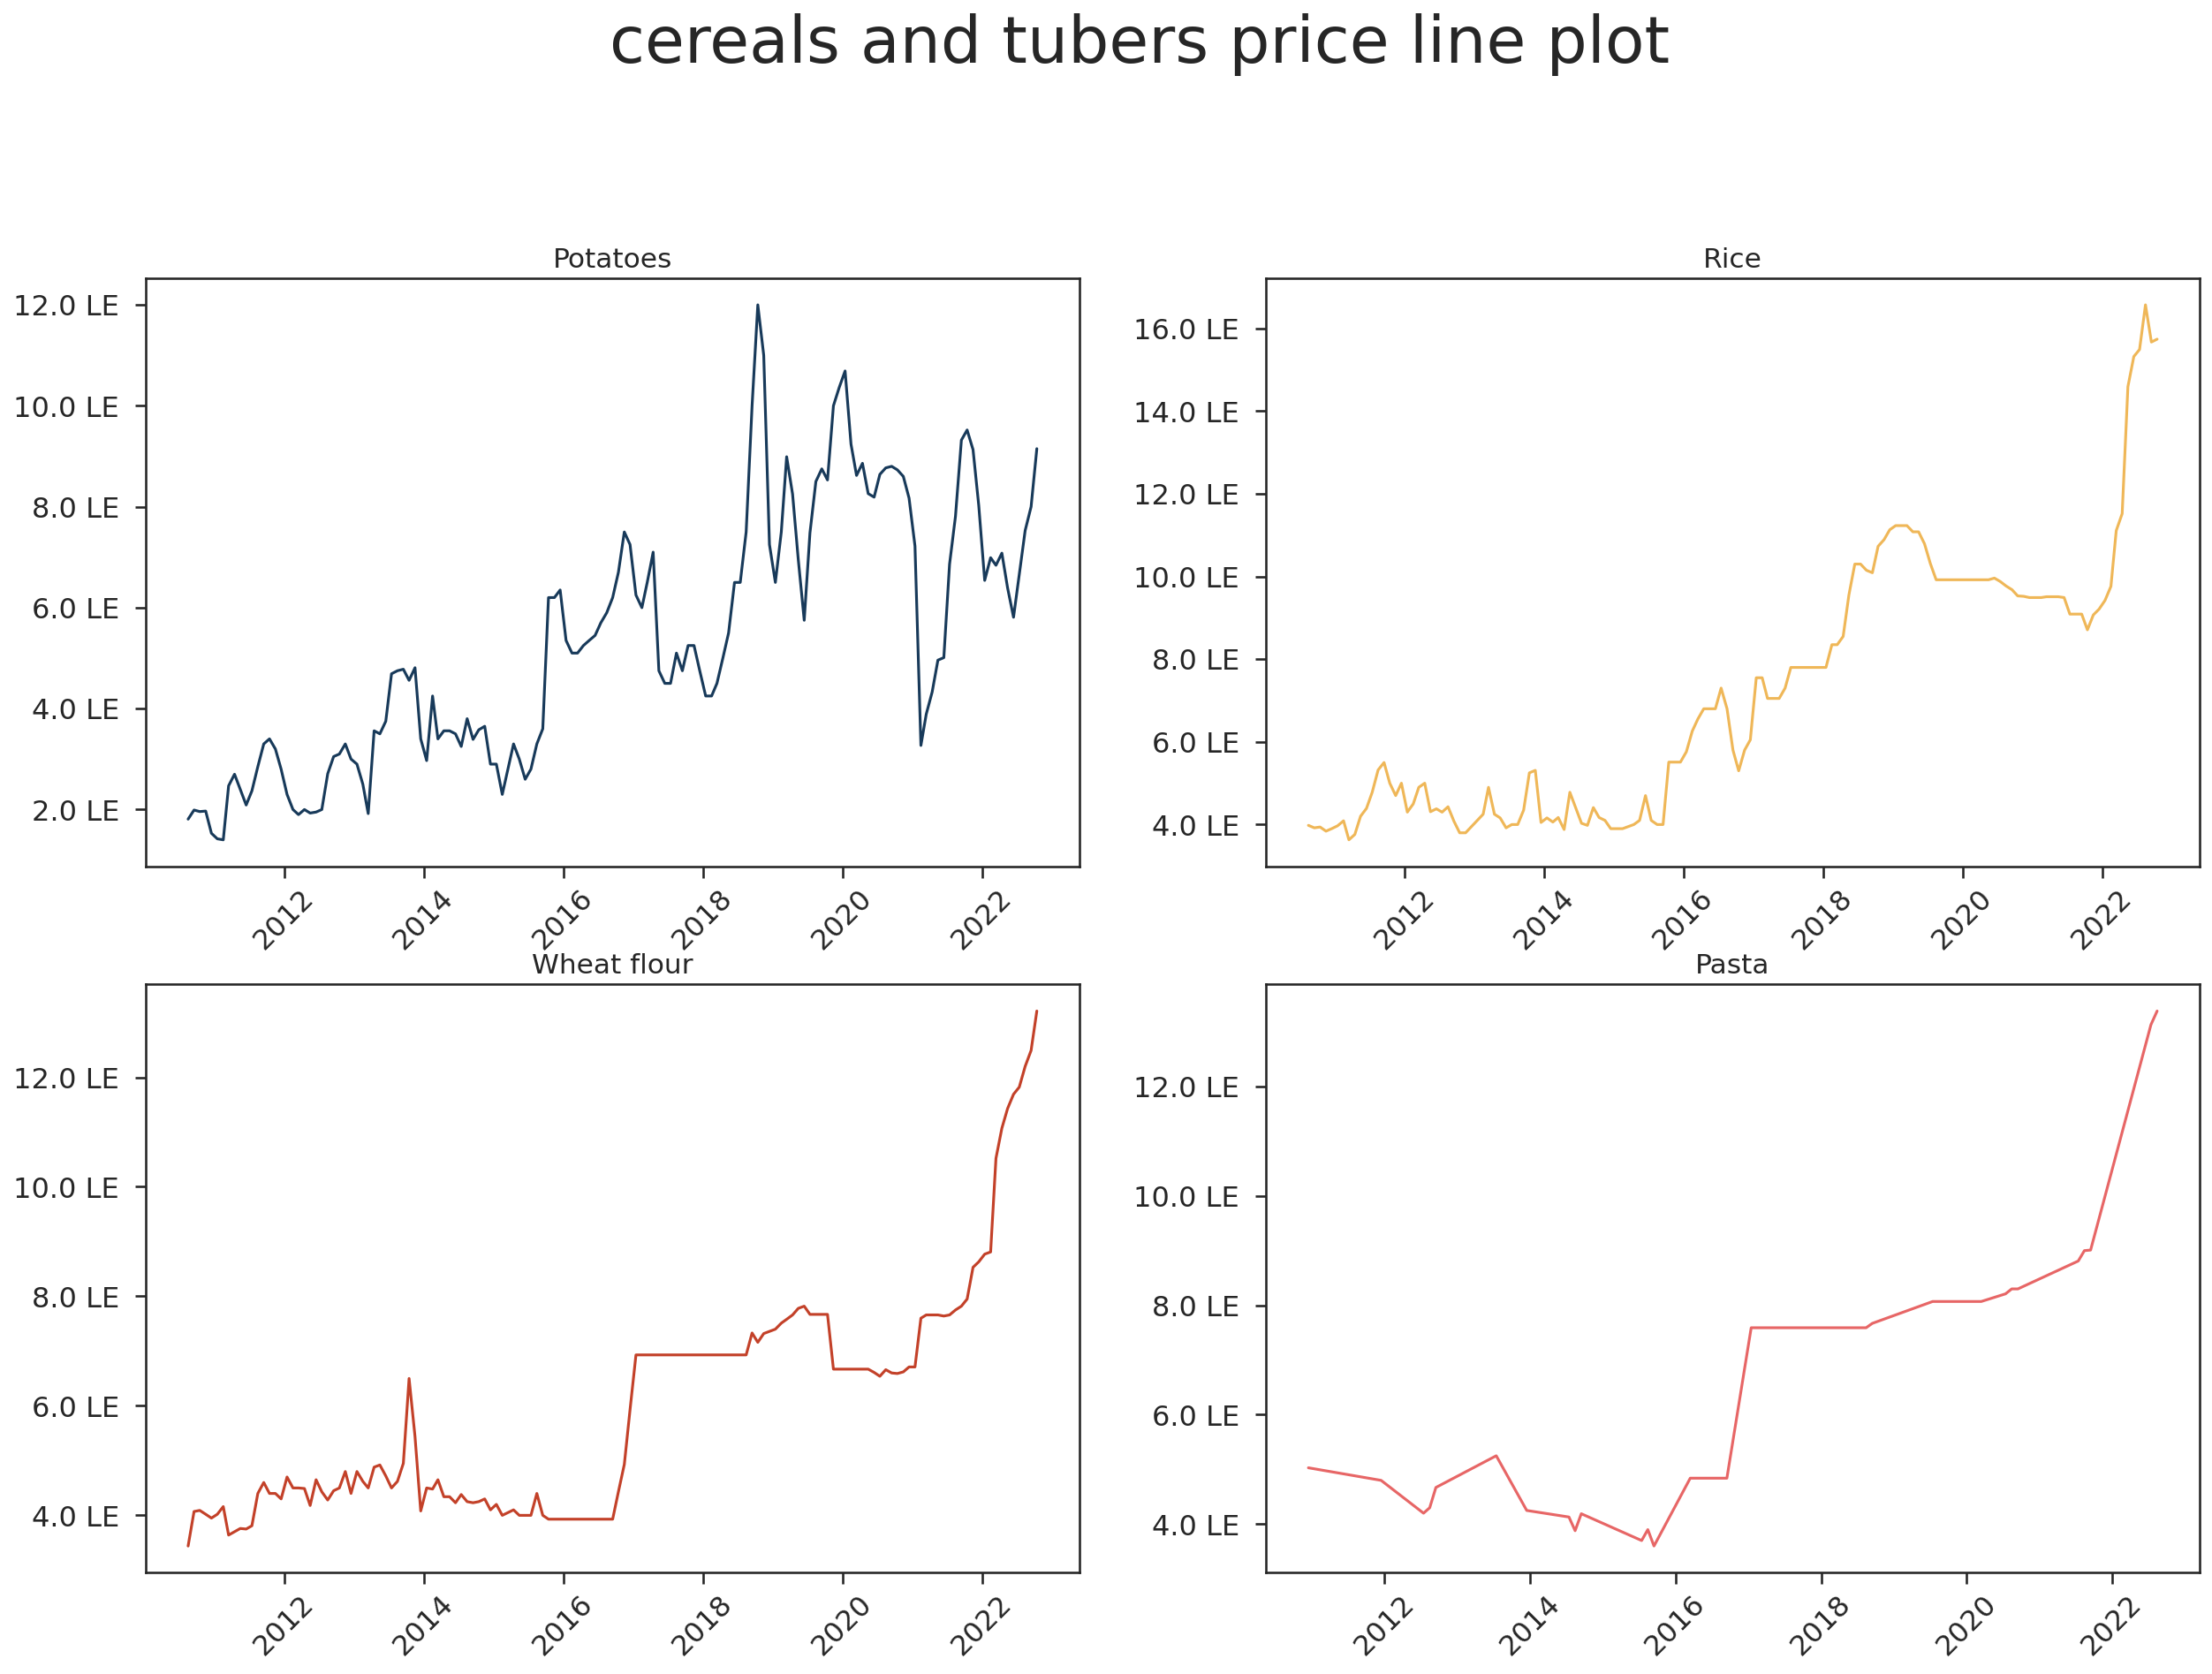

In [ ]:
# create function to plot line plot for each food name in given category in subplots
plot_linechart_foodName_in_category(df,'cereals and tubers')

## 2. plot regplot chart with average price and years for category

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning':50})
plt.close("all")

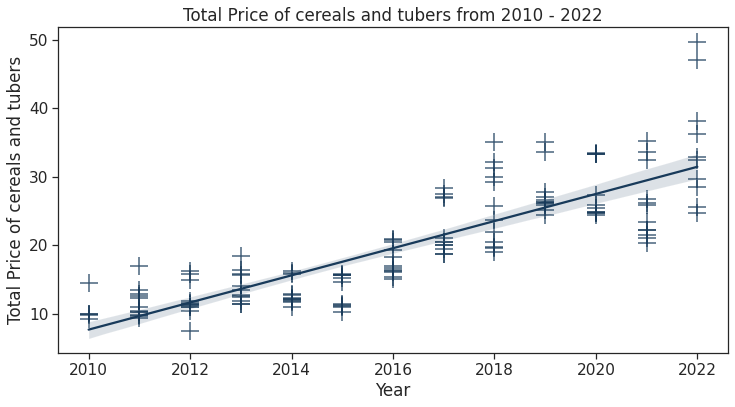

In [ ]:
# create function to plot regplot for mean price of given category

plot_regplot(df,'cereals and tubers')



## 3. plot bar chart with mean price for category

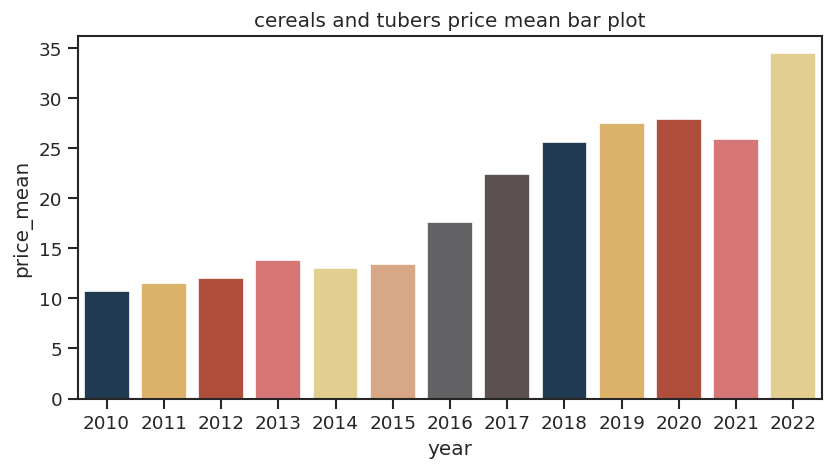

In [ ]:
# plot bar chart for mean price of given category

plot_bar_mean_price(df_years,'cereals and tubers')

## 4. plot bar chart with min and max price for category

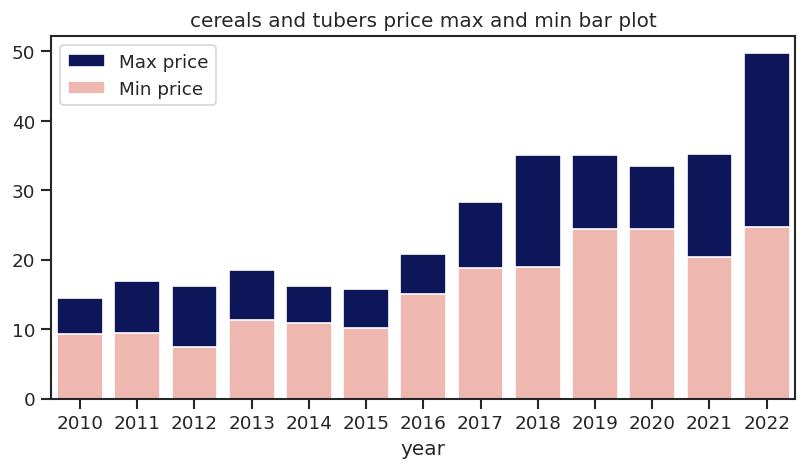

In [ ]:
# plot bar chart with max and min price of given category

plot_bar_min_max_price(df_years,'cereals and tubers')

## 5. plot bar chart with price change for category

<ipython-input-274-514eb5df1742>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



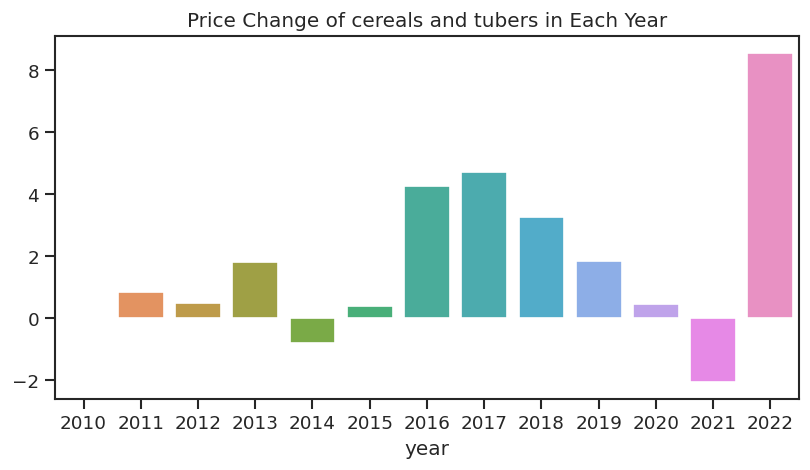

In [ ]:
# # plot price change for each year
# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=cereals_data['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# #axes[0].set_title('Distrbution Of Amount feature in Churn records')

# # convert to function
# def plot_bar_price_change(df,category):
#     sns.set(font_scale=1)
#     sns.set_style("ticks")
#     plt.figure(figsize=(8,4),dpi=120)
#     sns.barplot(x=df['year'],y=df[df['food_category']==category]['price_change']).set(ylabel=None,title=f'Price Change of {category} in Each Year')
#     plt.title(f'{category} price mean bar plot')
#     plt.show()

# plot_bar_price_change(df_years,'cereals and tubers')

# # plot bar chart with price change of given category

# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=df_years['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# plt.show()

plot_bar_price_change(df_years,'cereals and tubers')



In [ ]:
# %pip install plotly


## 6. plot time series chart with average price for category

In [ ]:
# Basic Range Slider and Range Selectors Time series with average price for category

plot_time_series_general_category(df,'cereals and tubers')

## 7. plot time series chart for each food name in category

In [ ]:
# Basic Range Slider and Range Selectors for each food name in category

plot_time_series_food_name(df,'cereals and tubers')

# 🧂 **Miscellaneous Food**

In [ ]:
food_category = 'miscellaneous food'

## 1. plot line chart for all food names in category

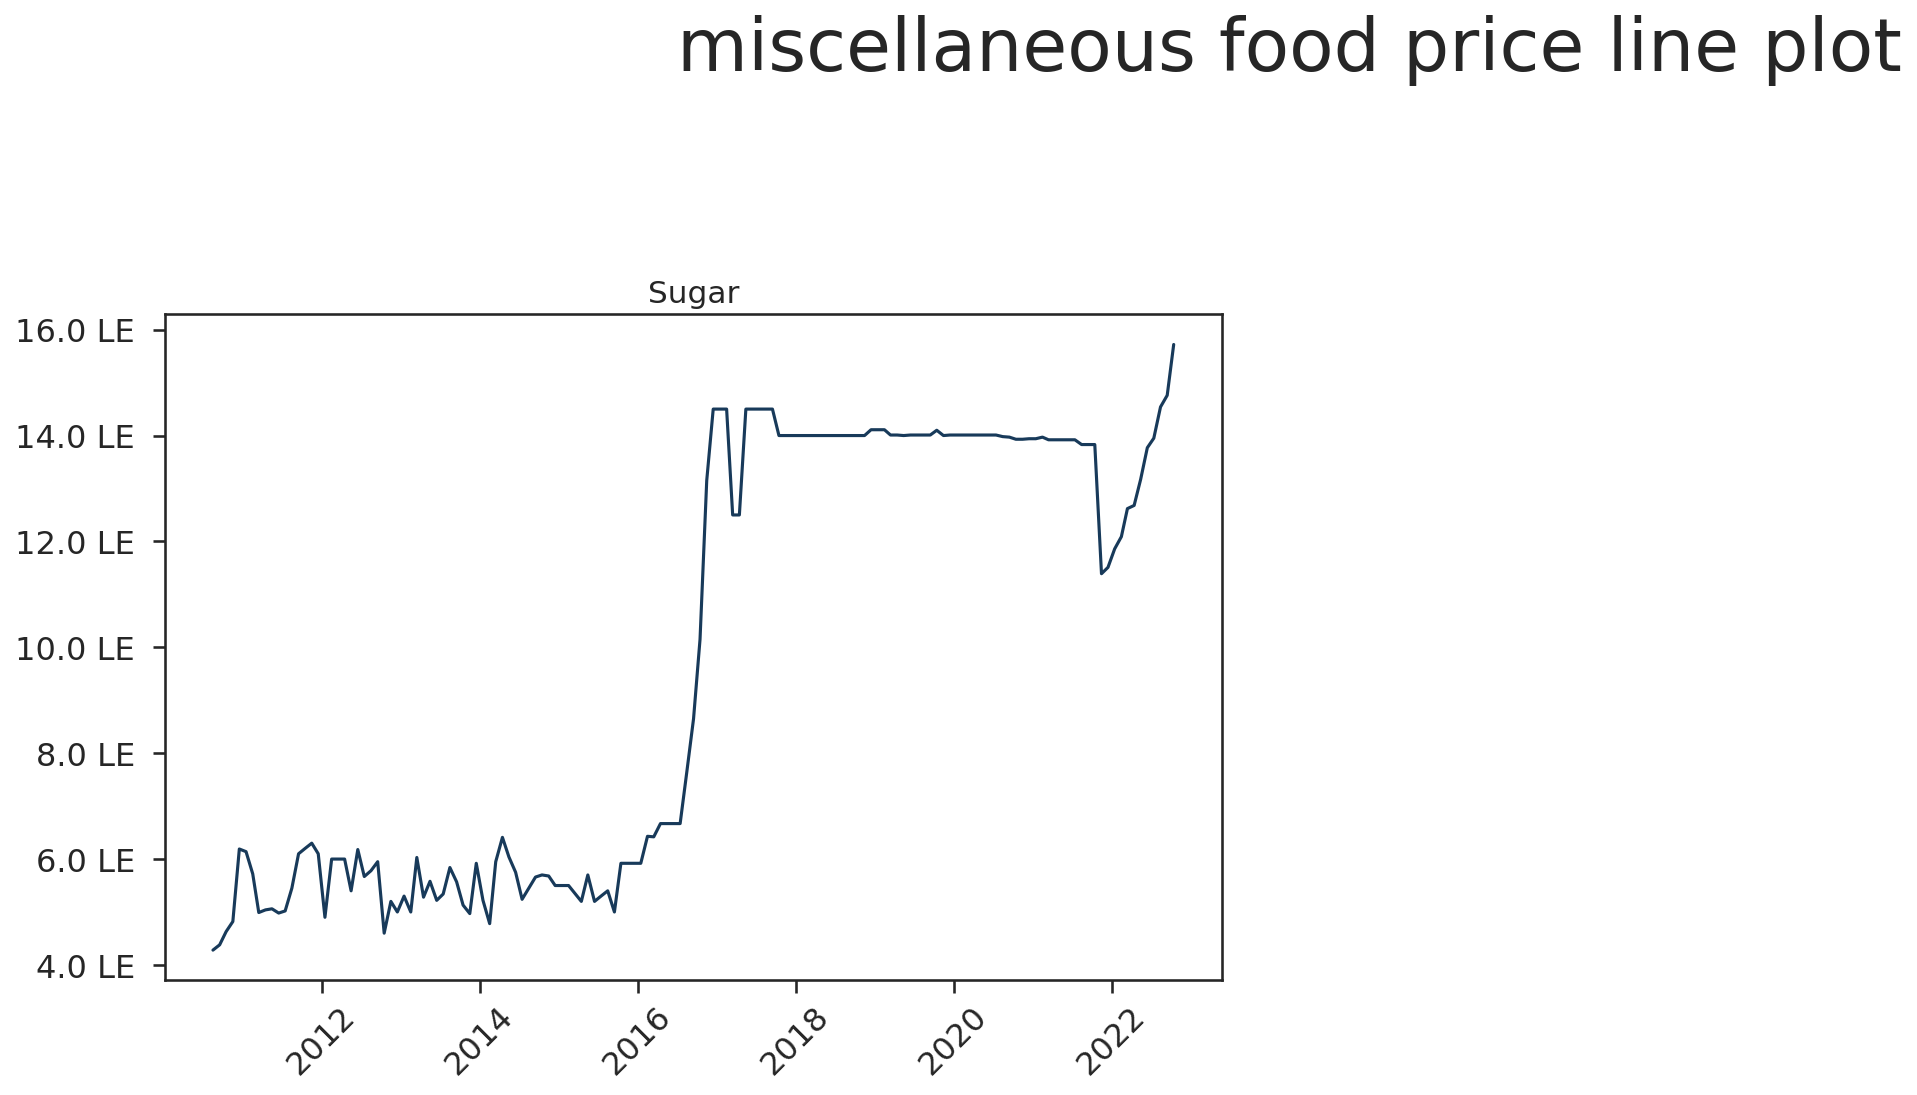

In [ ]:
# create function to plot line plot for each food name in given category in subplots
plot_linechart_foodName_in_category(df,food_category)

## 2. plot regplot chart with average price and years for category

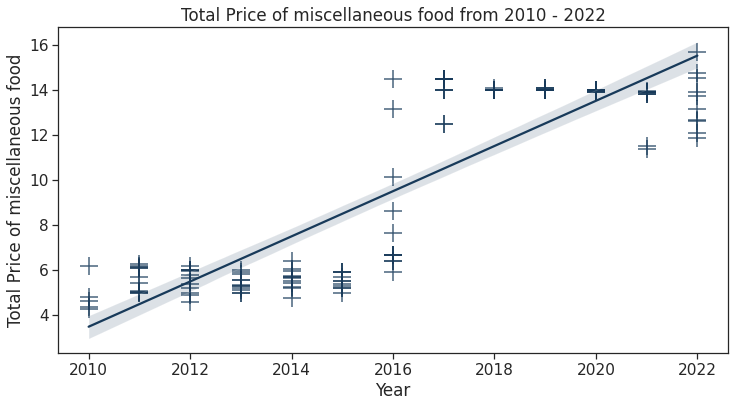

In [ ]:
# create function to plot regplot for mean price of given category

plot_regplot(df,food_category)


## 3. plot bar chart with mean price for category

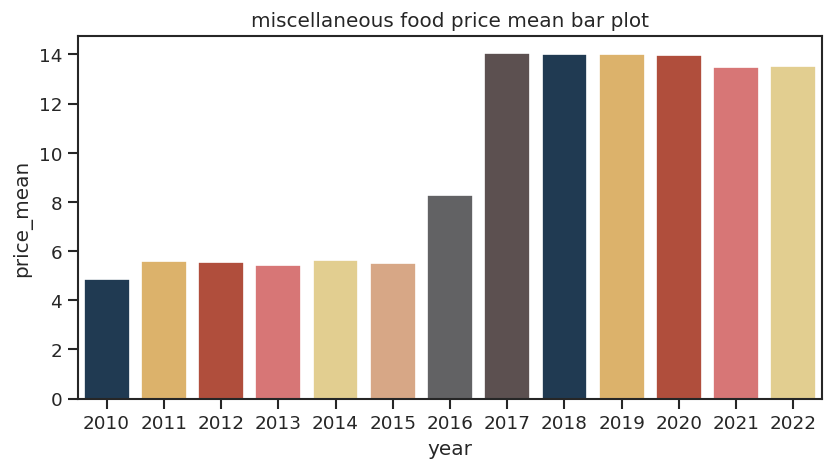

In [ ]:
# plot bar chart for mean price of given category

plot_bar_mean_price(df_years,food_category)

## 4. plot bar chart with min and max price for category

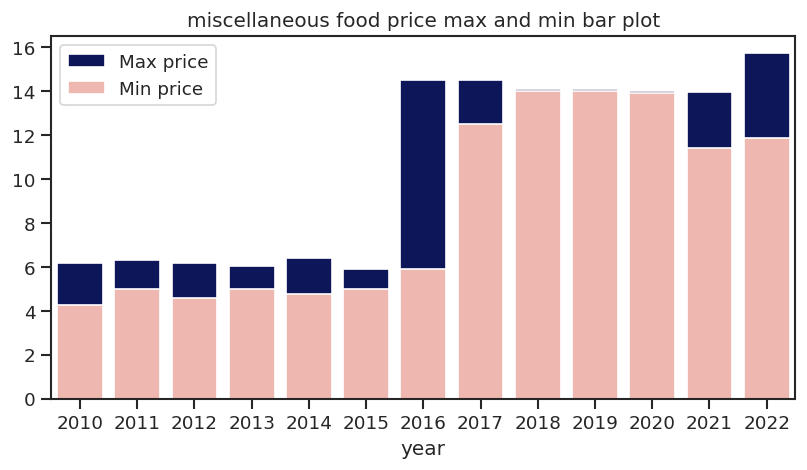

In [ ]:
# plot bar chart with max and min price of given category

plot_bar_min_max_price(df_years,food_category)

## 5. plot bar chart with price change for category

<ipython-input-274-514eb5df1742>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



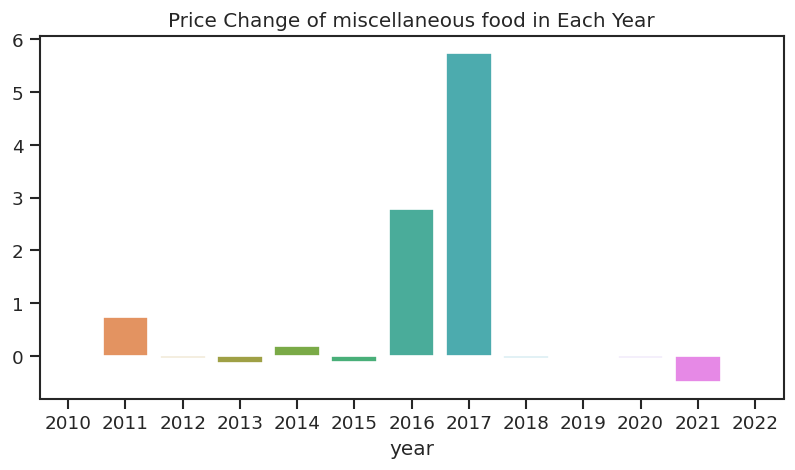

In [ ]:
# # plot price change for each year
plot_bar_price_change(df,food_category)



In [ ]:
# %pip install plotly


## 6. plot time series chart with average price for category

In [ ]:
# Basic Range Slider and Range Selectors Time series with average price for category

plot_time_series_general_category(df,food_category)

## 7. plot time series chart for each food name in category

In [ ]:
# Basic Range Slider and Range Selectors for each food name in category

plot_time_series_food_name(df,food_category)

# 🍖  **Meat,Fish and Eggs** 🐔 🥚

In [ ]:
df.food_category.unique()

array(['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'meat, fish and eggs',
       'milk and dairy'], dtype=object)

In [ ]:
# merge  'Meat (beef)' and  'Meat (beef, without bones)' beacuse meet untill 2015 is 'Meat (beef) ' and after 2015 is 'Meat (beef, without bones)'
df['food_name'] = df['food_name'].replace('Meat (beef, without bones)','Meat (beef)')

In [ ]:
food_category = 'meat, fish and eggs'

## 1. plot line chart for all food names in category

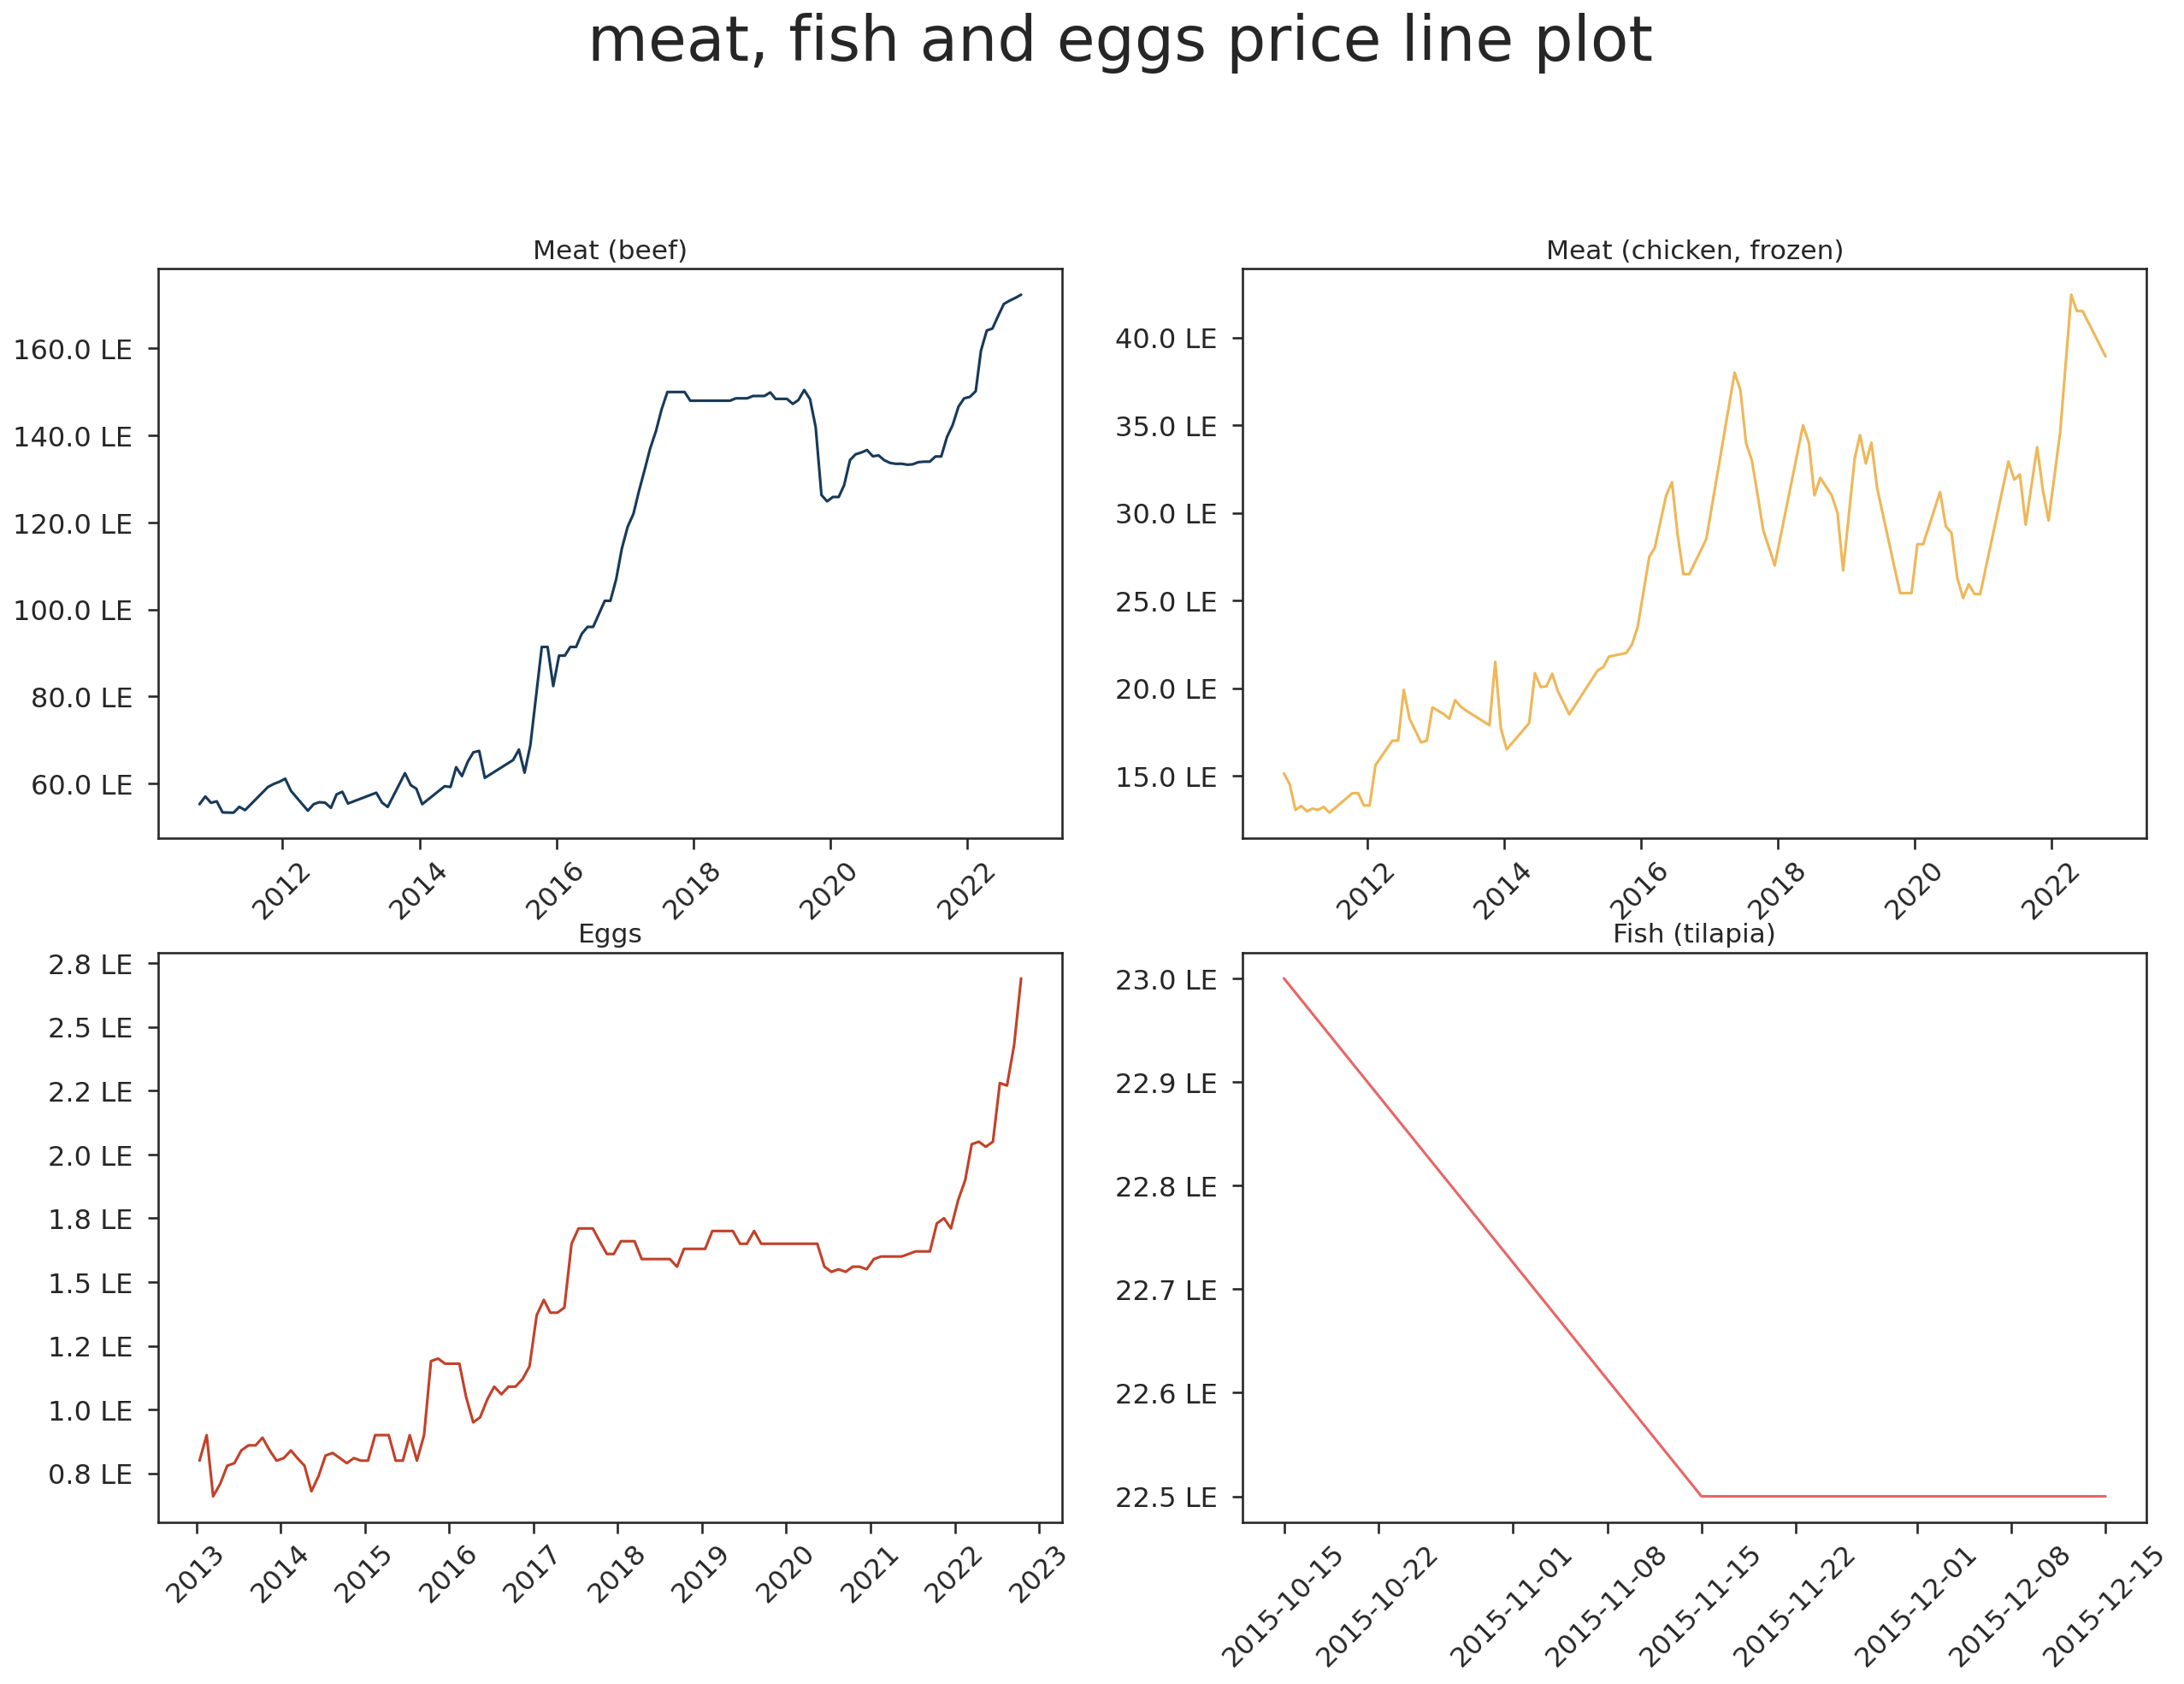

In [ ]:
# create function to plot line plot for each food name in given category in subplots
plot_linechart_foodName_in_category(df,food_category)

## 2. plot regplot chart with average price and years for category

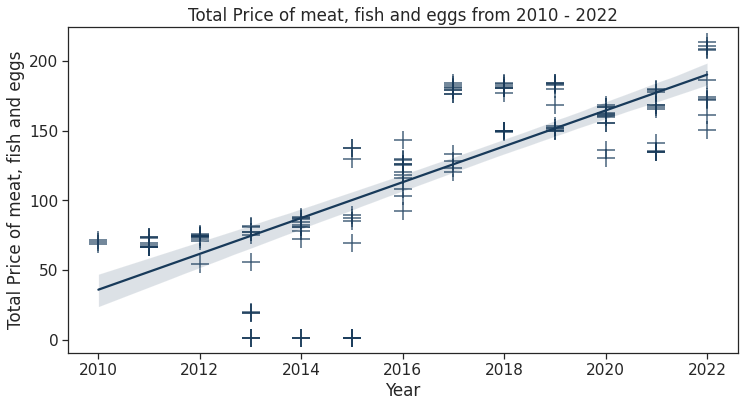

In [ ]:
# create function to plot regplot for mean price of given category

plot_regplot(df,food_category)


## 3. plot bar chart with mean price for category

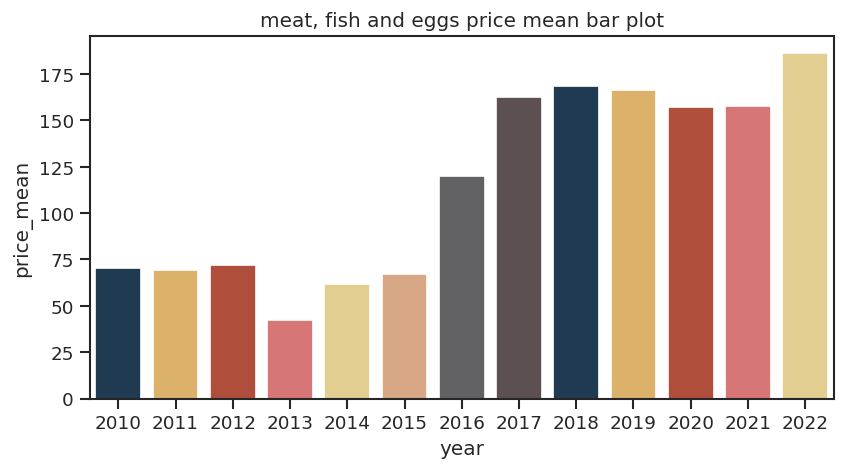

In [ ]:
# plot bar chart for mean price of given category

plot_bar_mean_price(df_years,food_category)

## 4. plot bar chart with min and max price for category

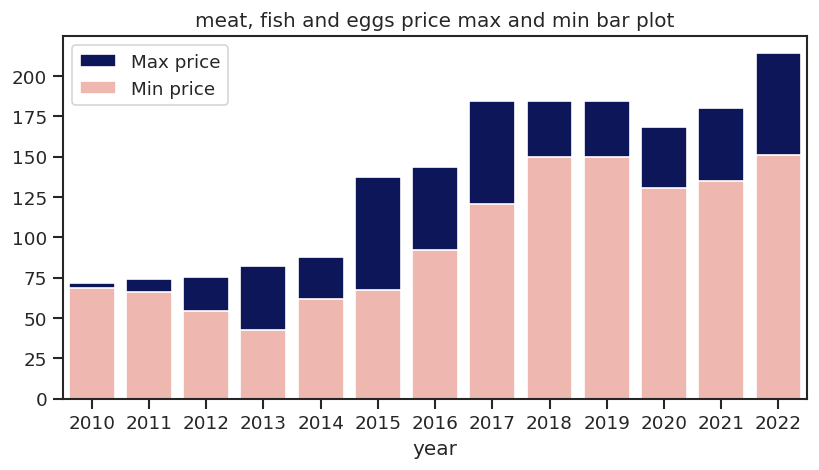

In [ ]:
# plot bar chart with max and min price of given category

plot_bar_min_max_price(df_years,food_category)

## 5. plot bar chart with price change for category

<ipython-input-274-514eb5df1742>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



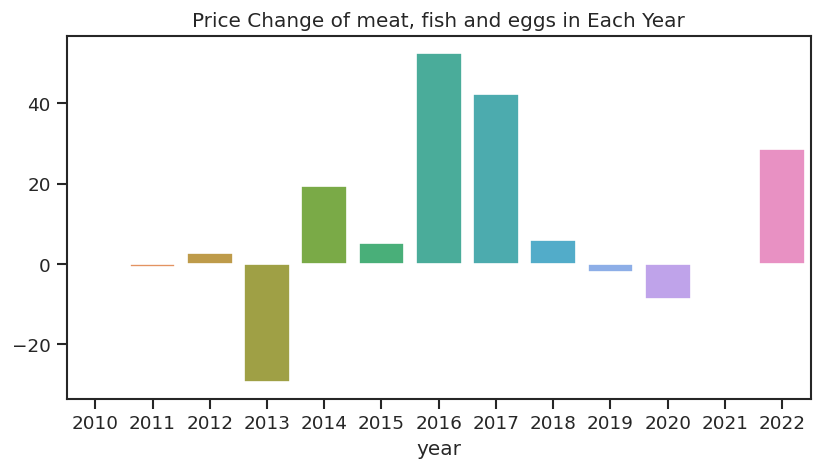

In [ ]:
# # plot price change for each year
# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=cereals_data['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# #axes[0].set_title('Distrbution Of Amount feature in Churn records')

# # convert to function
# def plot_bar_price_change(df,category):
#     sns.set(font_scale=1)
#     sns.set_style("ticks")
#     plt.figure(figsize=(8,4),dpi=120)
#     sns.barplot(x=df['year'],y=df[df['food_category']==category]['price_change']).set(ylabel=None,title=f'Price Change of {category} in Each Year')
#     plt.title(f'{category} price mean bar plot')
#     plt.show()

# plot_bar_price_change(df_years,'cereals and tubers')

# # plot bar chart with price change of given category

# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=df_years['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# plt.show()

plot_bar_price_change(df,food_category)



In [ ]:
# %pip install plotly


## 6. plot time series chart with average price for category

In [ ]:
# Basic Range Slider and Range Selectors Time series with average price for category

plot_time_series_general_category(df,food_category)

## 7. plot time series chart for each food name in category

In [ ]:
# Basic Range Slider and Range Selectors for each food name in category

plot_time_series_food_name(df,food_category)

# 🧈 🍞 **Oils and Fats**

In [ ]:
df.food_category.unique()

array(['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'meat, fish and eggs',
       'milk and dairy'], dtype=object)

In [ ]:
food_category = 'oil and fats'

## 1. plot line chart for all food names in category

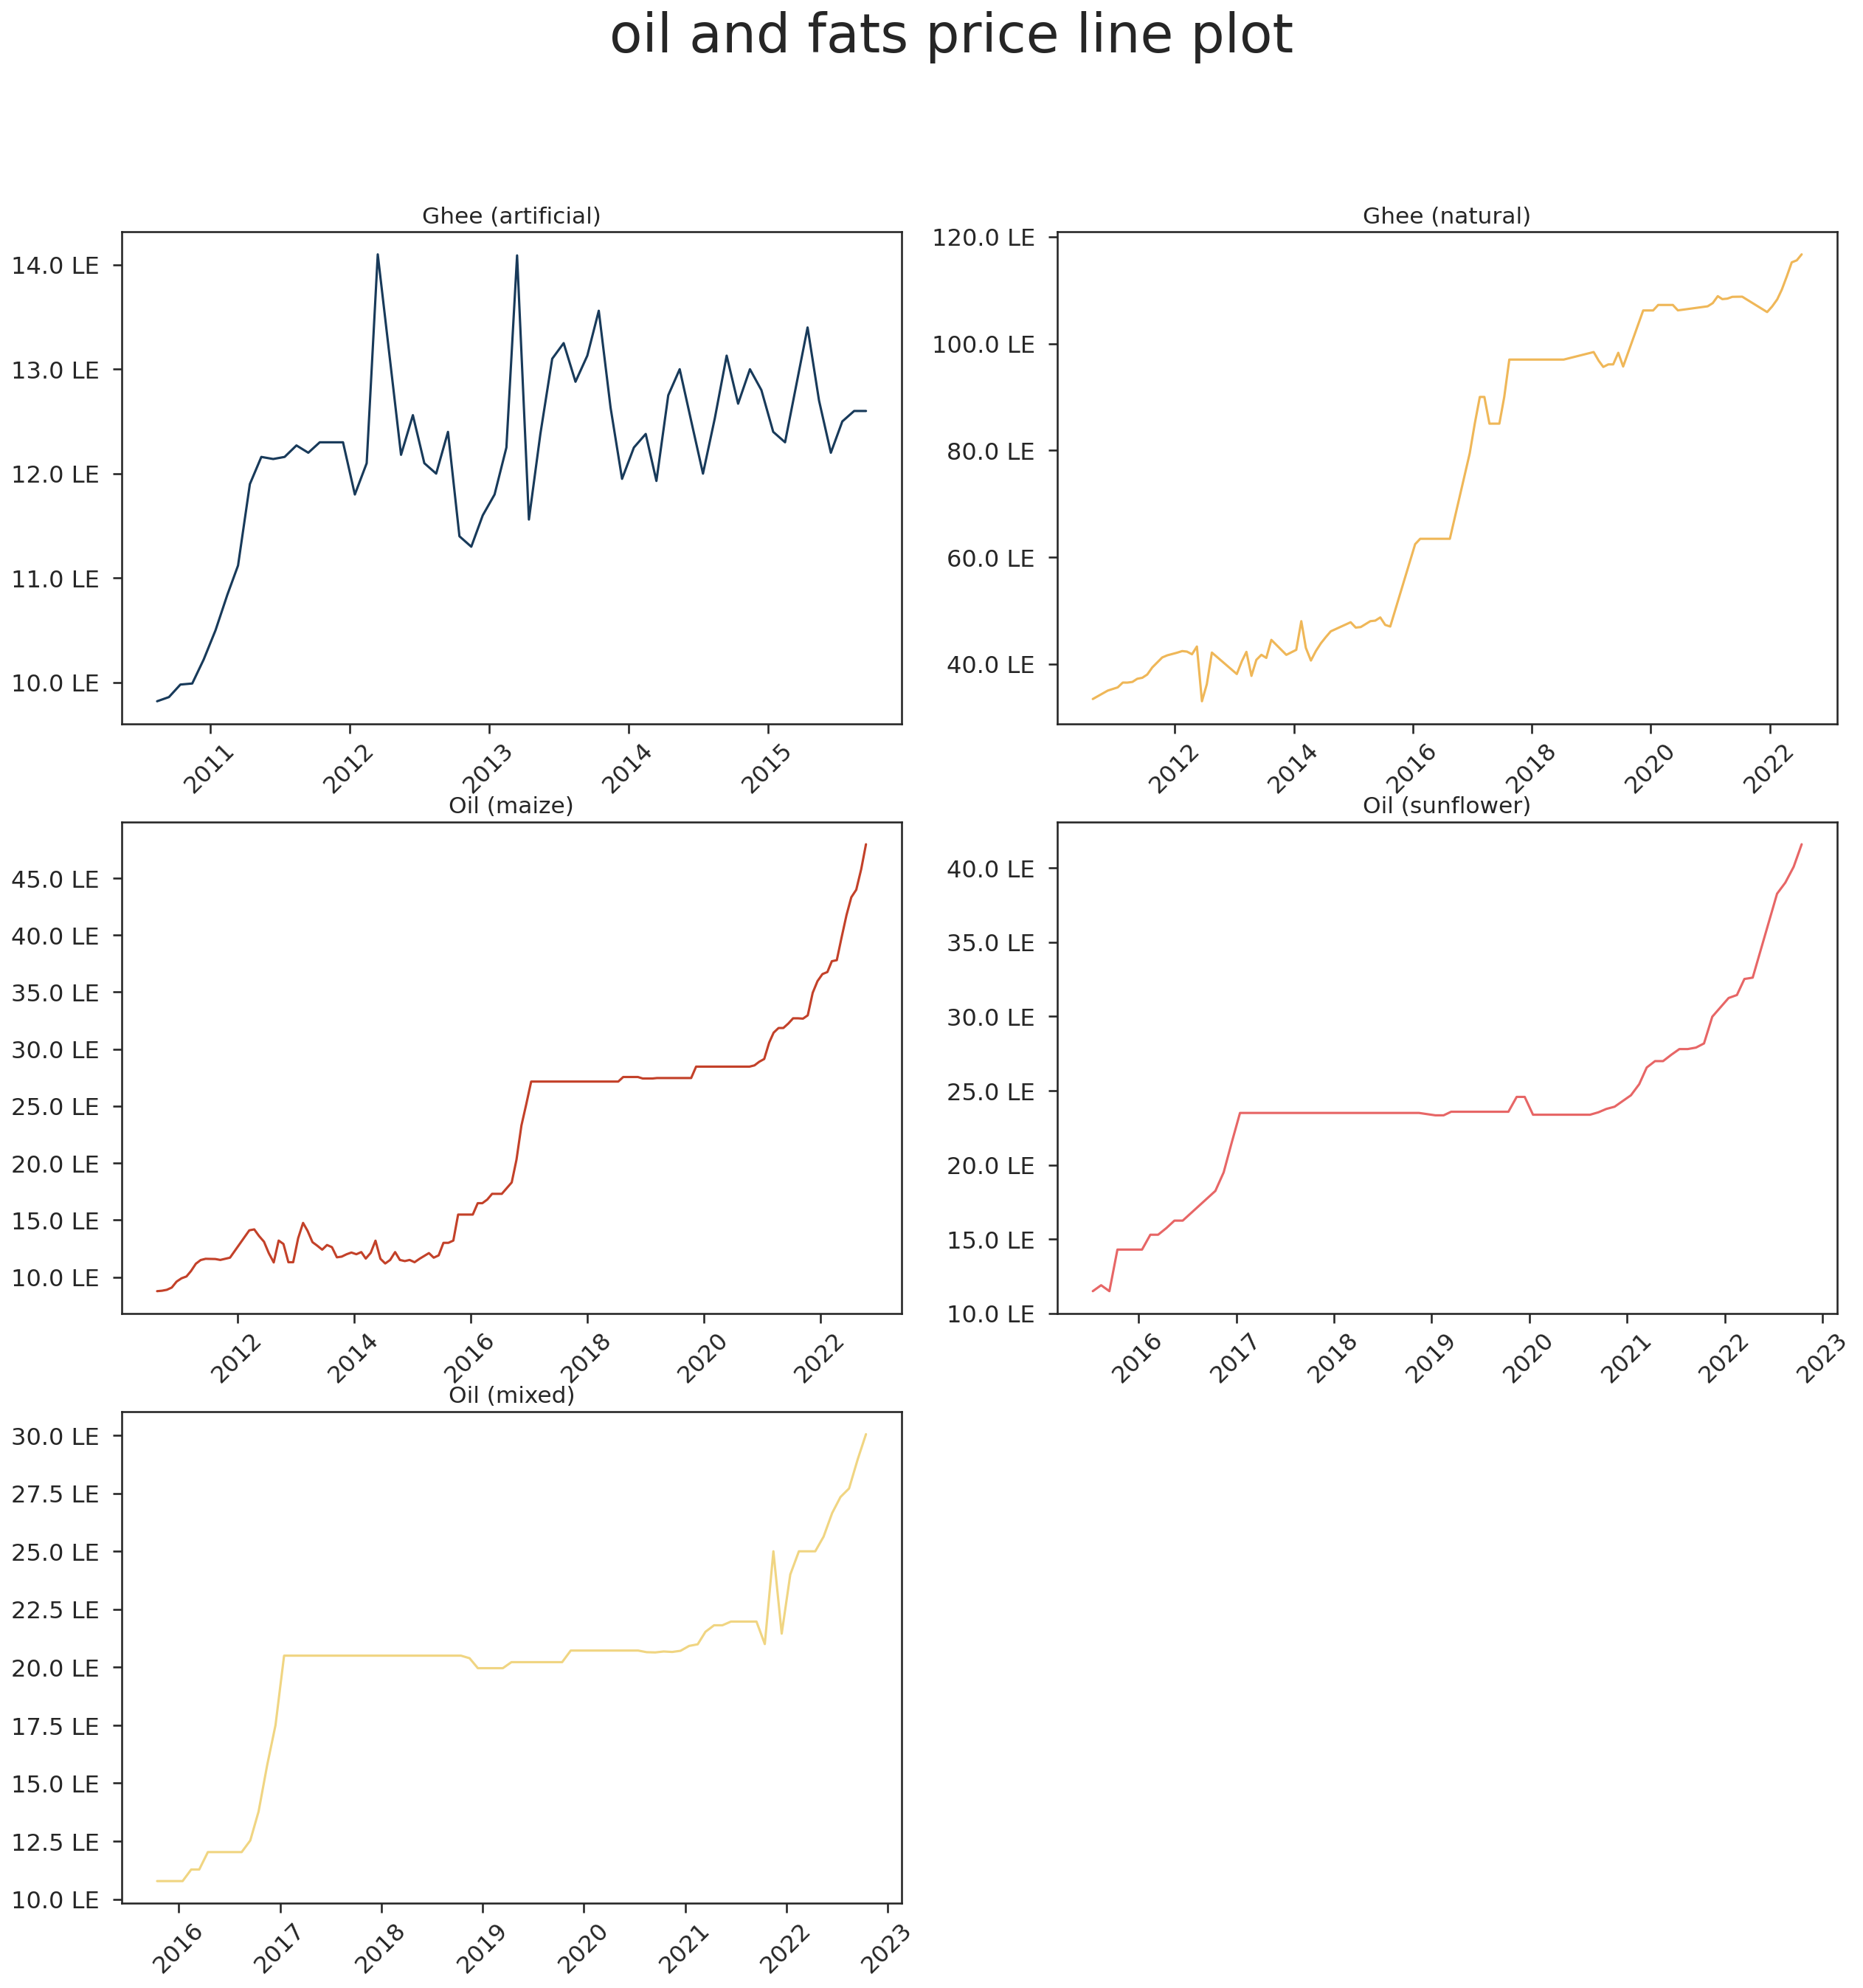

In [ ]:
# create function to plot line plot for each food name in given category in subplots
plot_linechart_foodName_in_category(df,food_category)

## 2. plot regplot chart with average price and years for category

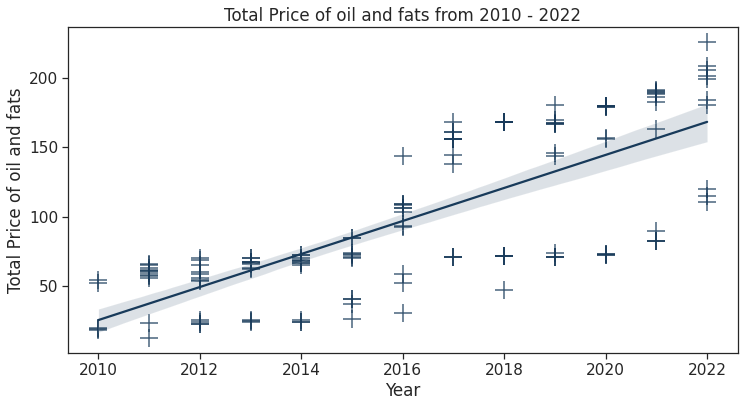

In [ ]:
# create function to plot regplot for mean price of given category

plot_regplot(df,food_category)


## 3. plot bar chart with mean price for category

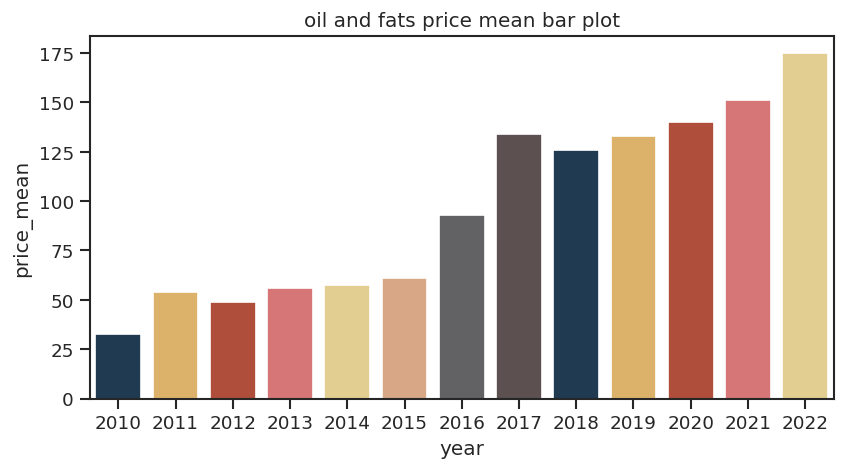

In [ ]:
# plot bar chart for mean price of given category

plot_bar_mean_price(df_years,food_category)

## 4. plot bar chart with min and max price for category

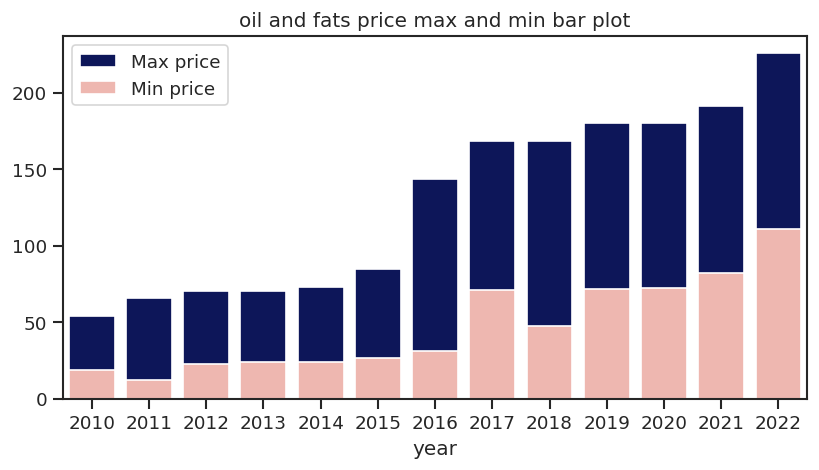

In [ ]:
# plot bar chart with max and min price of given category

plot_bar_min_max_price(df_years,food_category)

## 5. plot bar chart with price change for category

<ipython-input-274-514eb5df1742>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



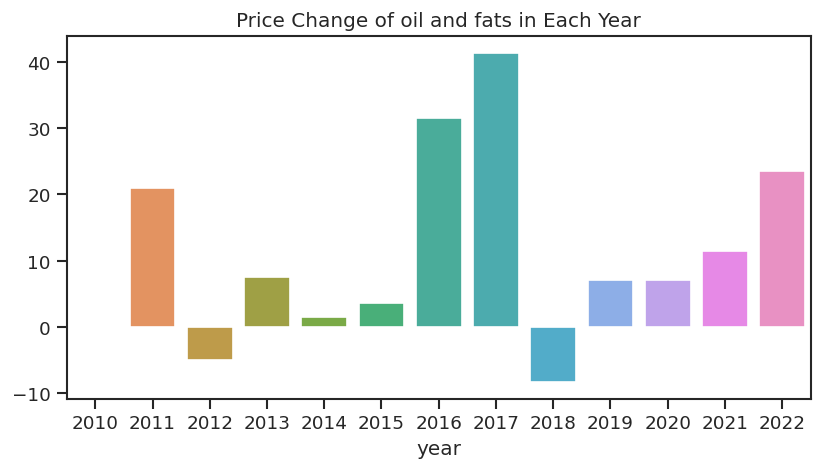

In [ ]:
# # plot price change for each year
# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=cereals_data['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# #axes[0].set_title('Distrbution Of Amount feature in Churn records')

# # convert to function
# def plot_bar_price_change(df,category):
#     sns.set(font_scale=1)
#     sns.set_style("ticks")
#     plt.figure(figsize=(8,4),dpi=120)
#     sns.barplot(x=df['year'],y=df[df['food_category']==category]['price_change']).set(ylabel=None,title=f'Price Change of {category} in Each Year')
#     plt.title(f'{category} price mean bar plot')
#     plt.show()

# plot_bar_price_change(df_years,'cereals and tubers')

# # plot bar chart with price change of given category

# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=df_years['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# plt.show()

plot_bar_price_change(df,food_category)



In [ ]:
# %pip install plotly


## 6. plot time series chart with average price for category

In [ ]:
# Basic Range Slider and Range Selectors Time series with average price for category

plot_time_series_general_category(df,food_category)

## 7. plot time series chart for each food name in category

In [ ]:
# Basic Range Slider and Range Selectors for each food name in category

plot_time_series_food_name(df,food_category)

# 🍅 🧄  **Vegtables And Fruits**

In [ ]:
df.food_category.unique()

array(['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'meat, fish and eggs',
       'milk and dairy'], dtype=object)

In [ ]:
food_category = 'vegetables and fruits'

## 1. plot line chart for all food names in category

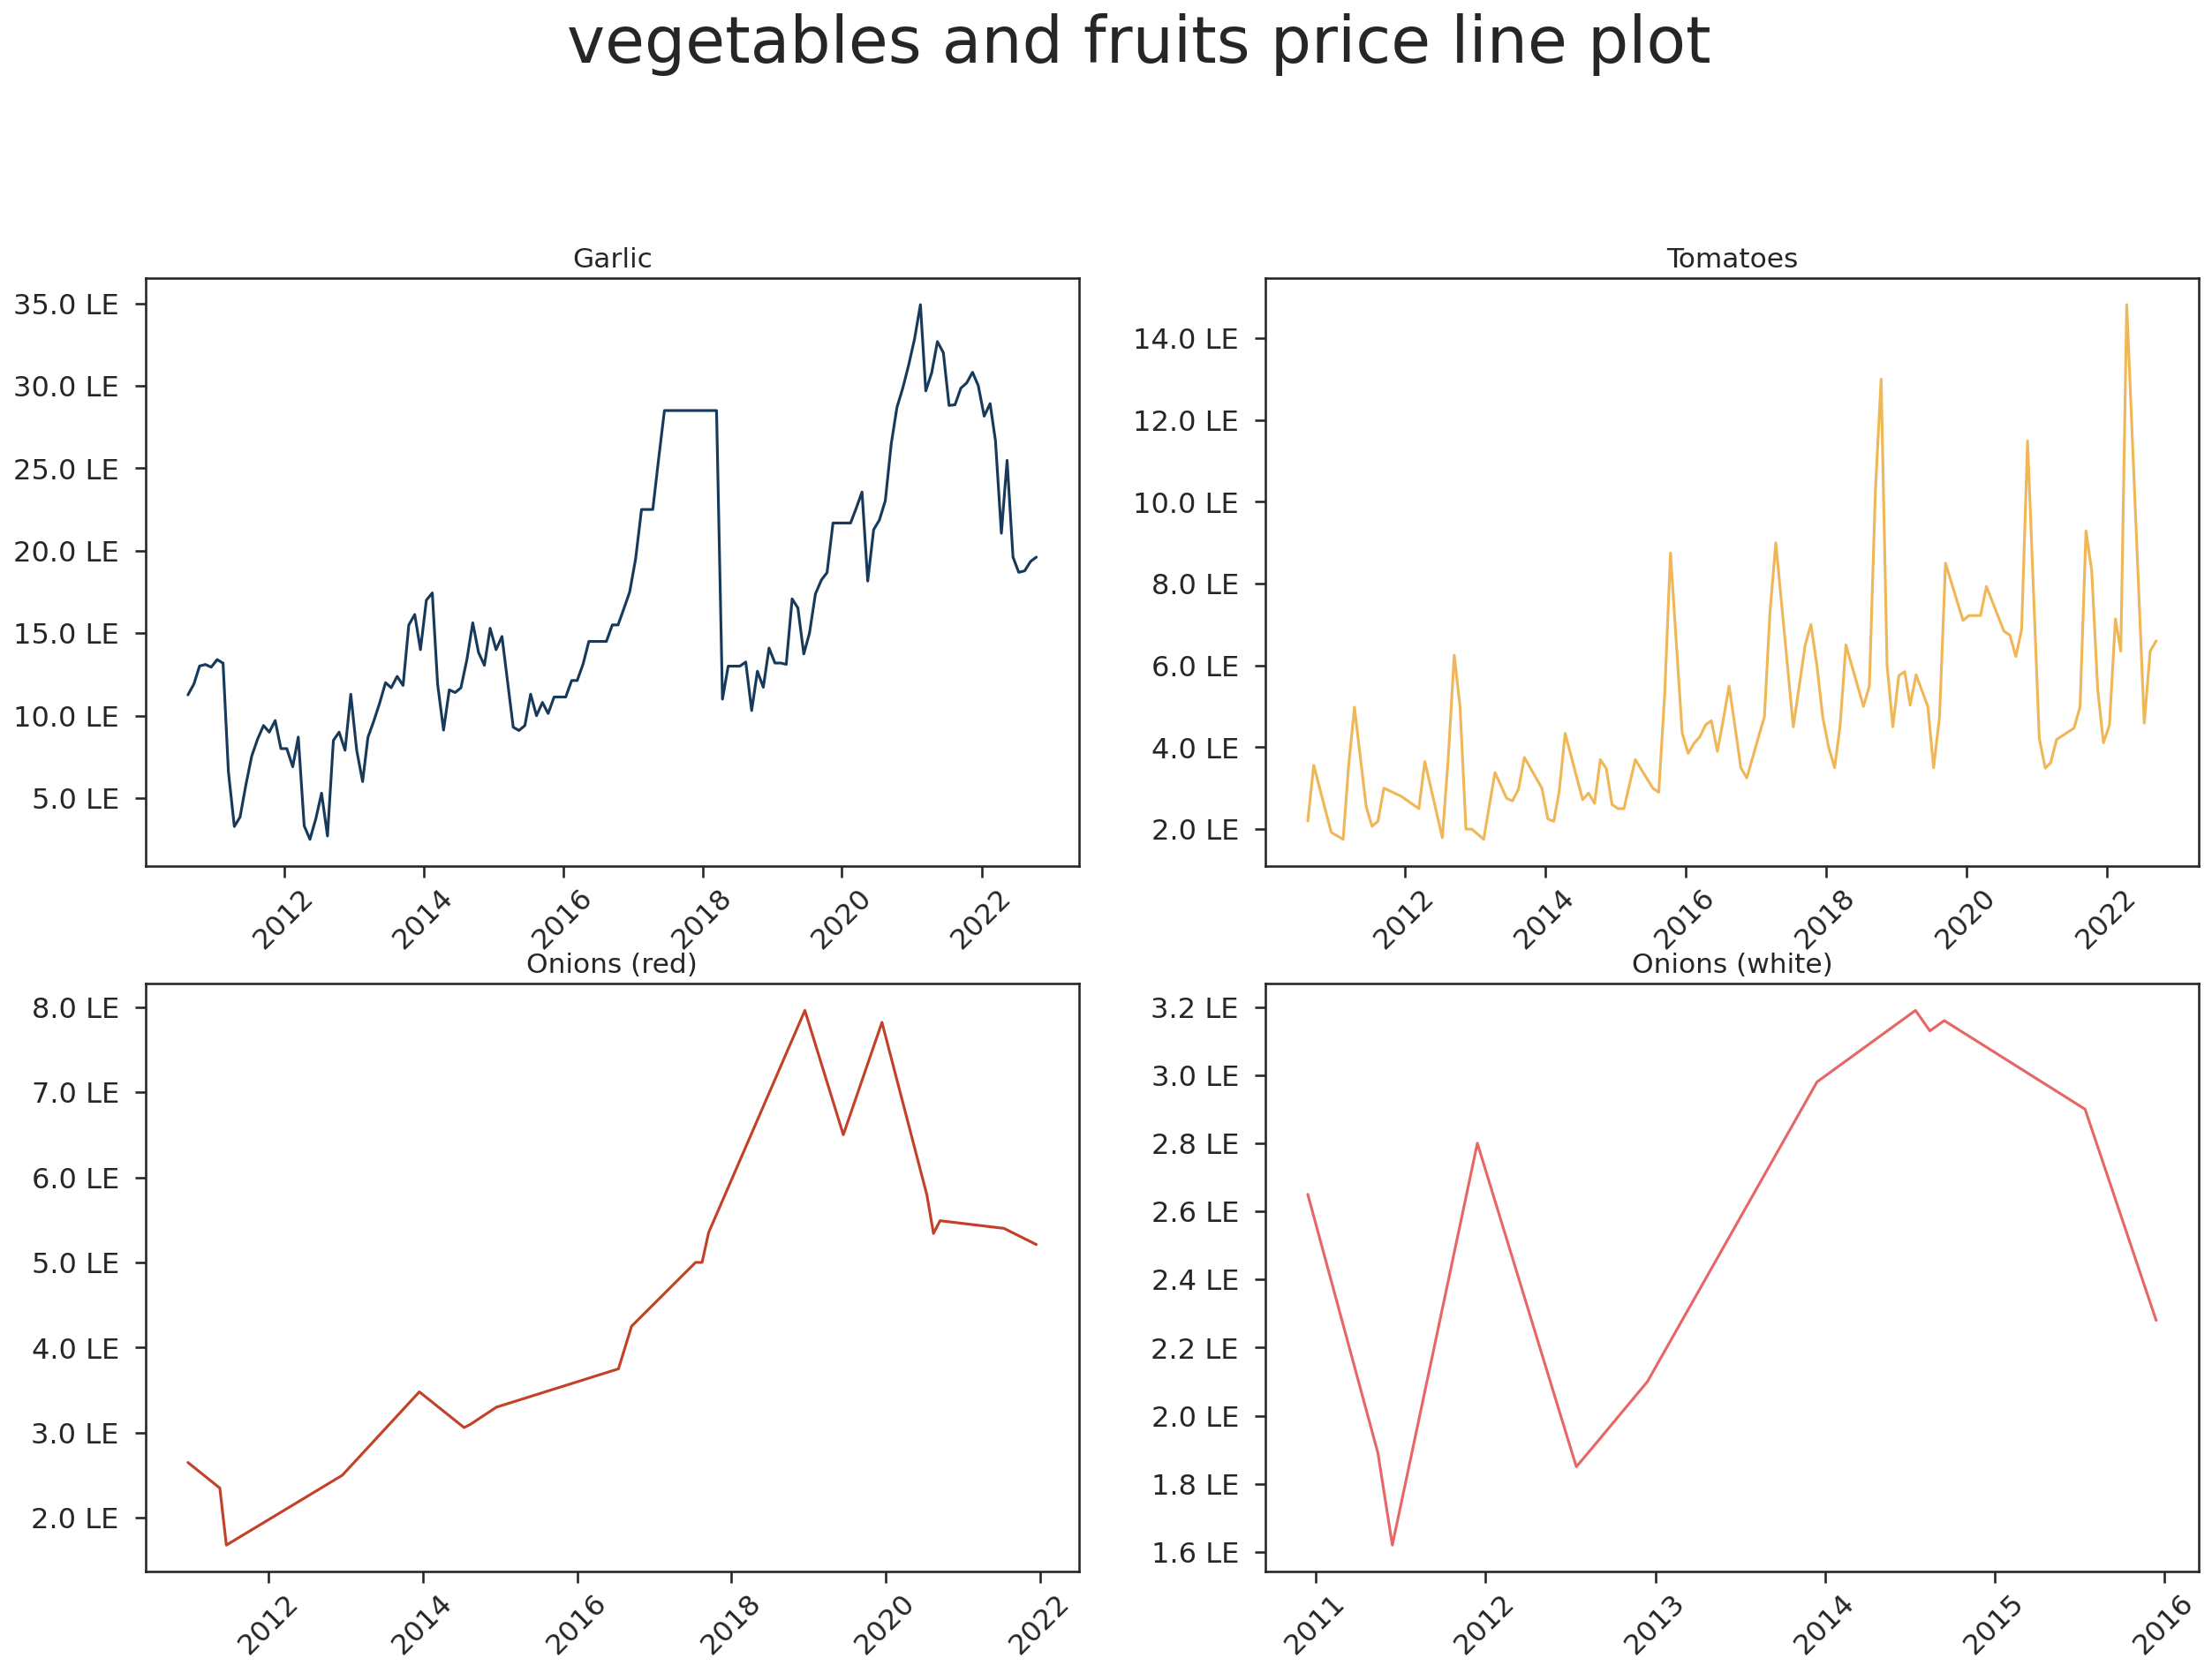

In [ ]:
# create function to plot line plot for each food name in given category in subplots
plot_linechart_foodName_in_category(df,food_category)

## 2. plot regplot chart with average price and years for category

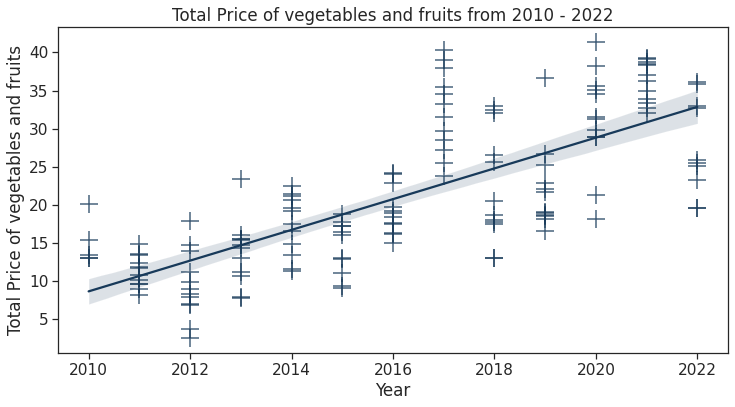

In [ ]:
# create function to plot regplot for mean price of given category

plot_regplot(df,food_category)


## 3. plot bar chart with mean price for category

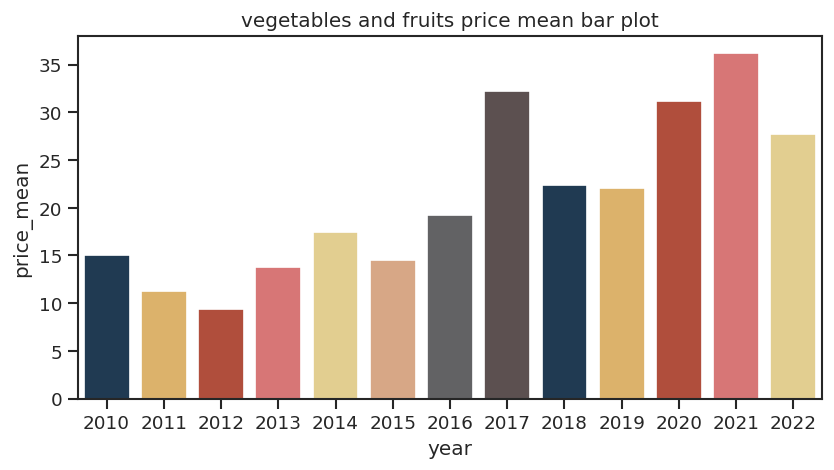

In [ ]:
# plot bar chart for mean price of given category

plot_bar_mean_price(df_years,food_category)

## 4. plot bar chart with min and max price for category

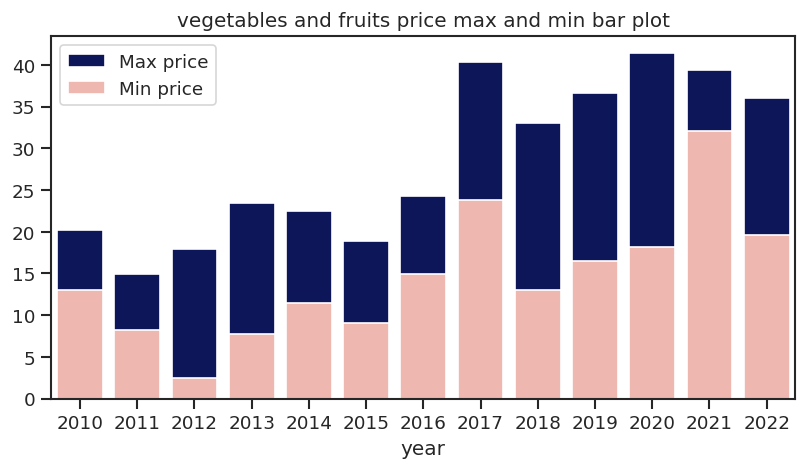

In [ ]:
# plot bar chart with max and min price of given category

plot_bar_min_max_price(df_years,food_category)

## 5. plot bar chart with price change for category

<ipython-input-274-514eb5df1742>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



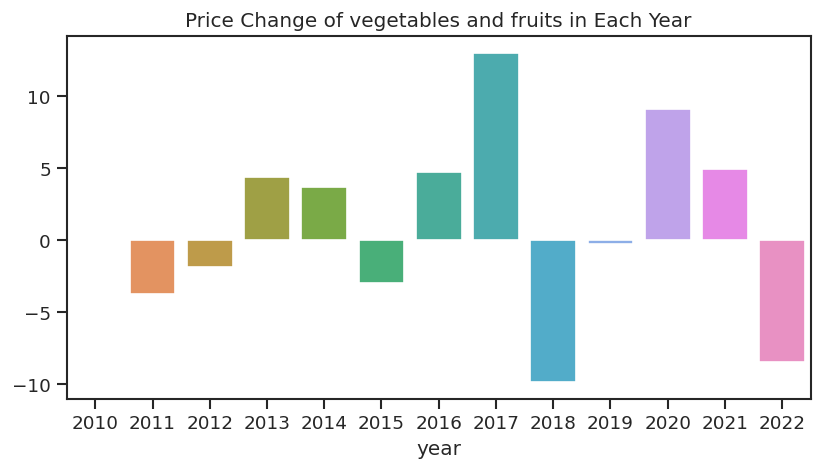

In [ ]:
# # plot price change for each year
# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=cereals_data['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# #axes[0].set_title('Distrbution Of Amount feature in Churn records')

# # convert to function
# def plot_bar_price_change(df,category):
#     sns.set(font_scale=1)
#     sns.set_style("ticks")
#     plt.figure(figsize=(8,4),dpi=120)
#     sns.barplot(x=df['year'],y=df[df['food_category']==category]['price_change']).set(ylabel=None,title=f'Price Change of {category} in Each Year')
#     plt.title(f'{category} price mean bar plot')
#     plt.show()

# plot_bar_price_change(df_years,'cereals and tubers')

# # plot bar chart with price change of given category

# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=df_years['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# plt.show()

plot_bar_price_change(df,food_category)



In [ ]:
# %pip install plotly


## 6. plot time series chart with average price for category

In [ ]:
# Basic Range Slider and Range Selectors Time series with average price for category

plot_time_series_general_category(df,food_category)

## 7. plot time series chart for each food name in category

In [ ]:
# Basic Range Slider and Range Selectors for each food name in category

plot_time_series_food_name(df,food_category)

# 🥛 🧀 **Milk and Dairy**

In [ ]:
df.food_category.unique()

array(['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'meat, fish and eggs',
       'milk and dairy'], dtype=object)

In [ ]:
food_category = 'milk and dairy'

## 1. plot line chart for all food names in category

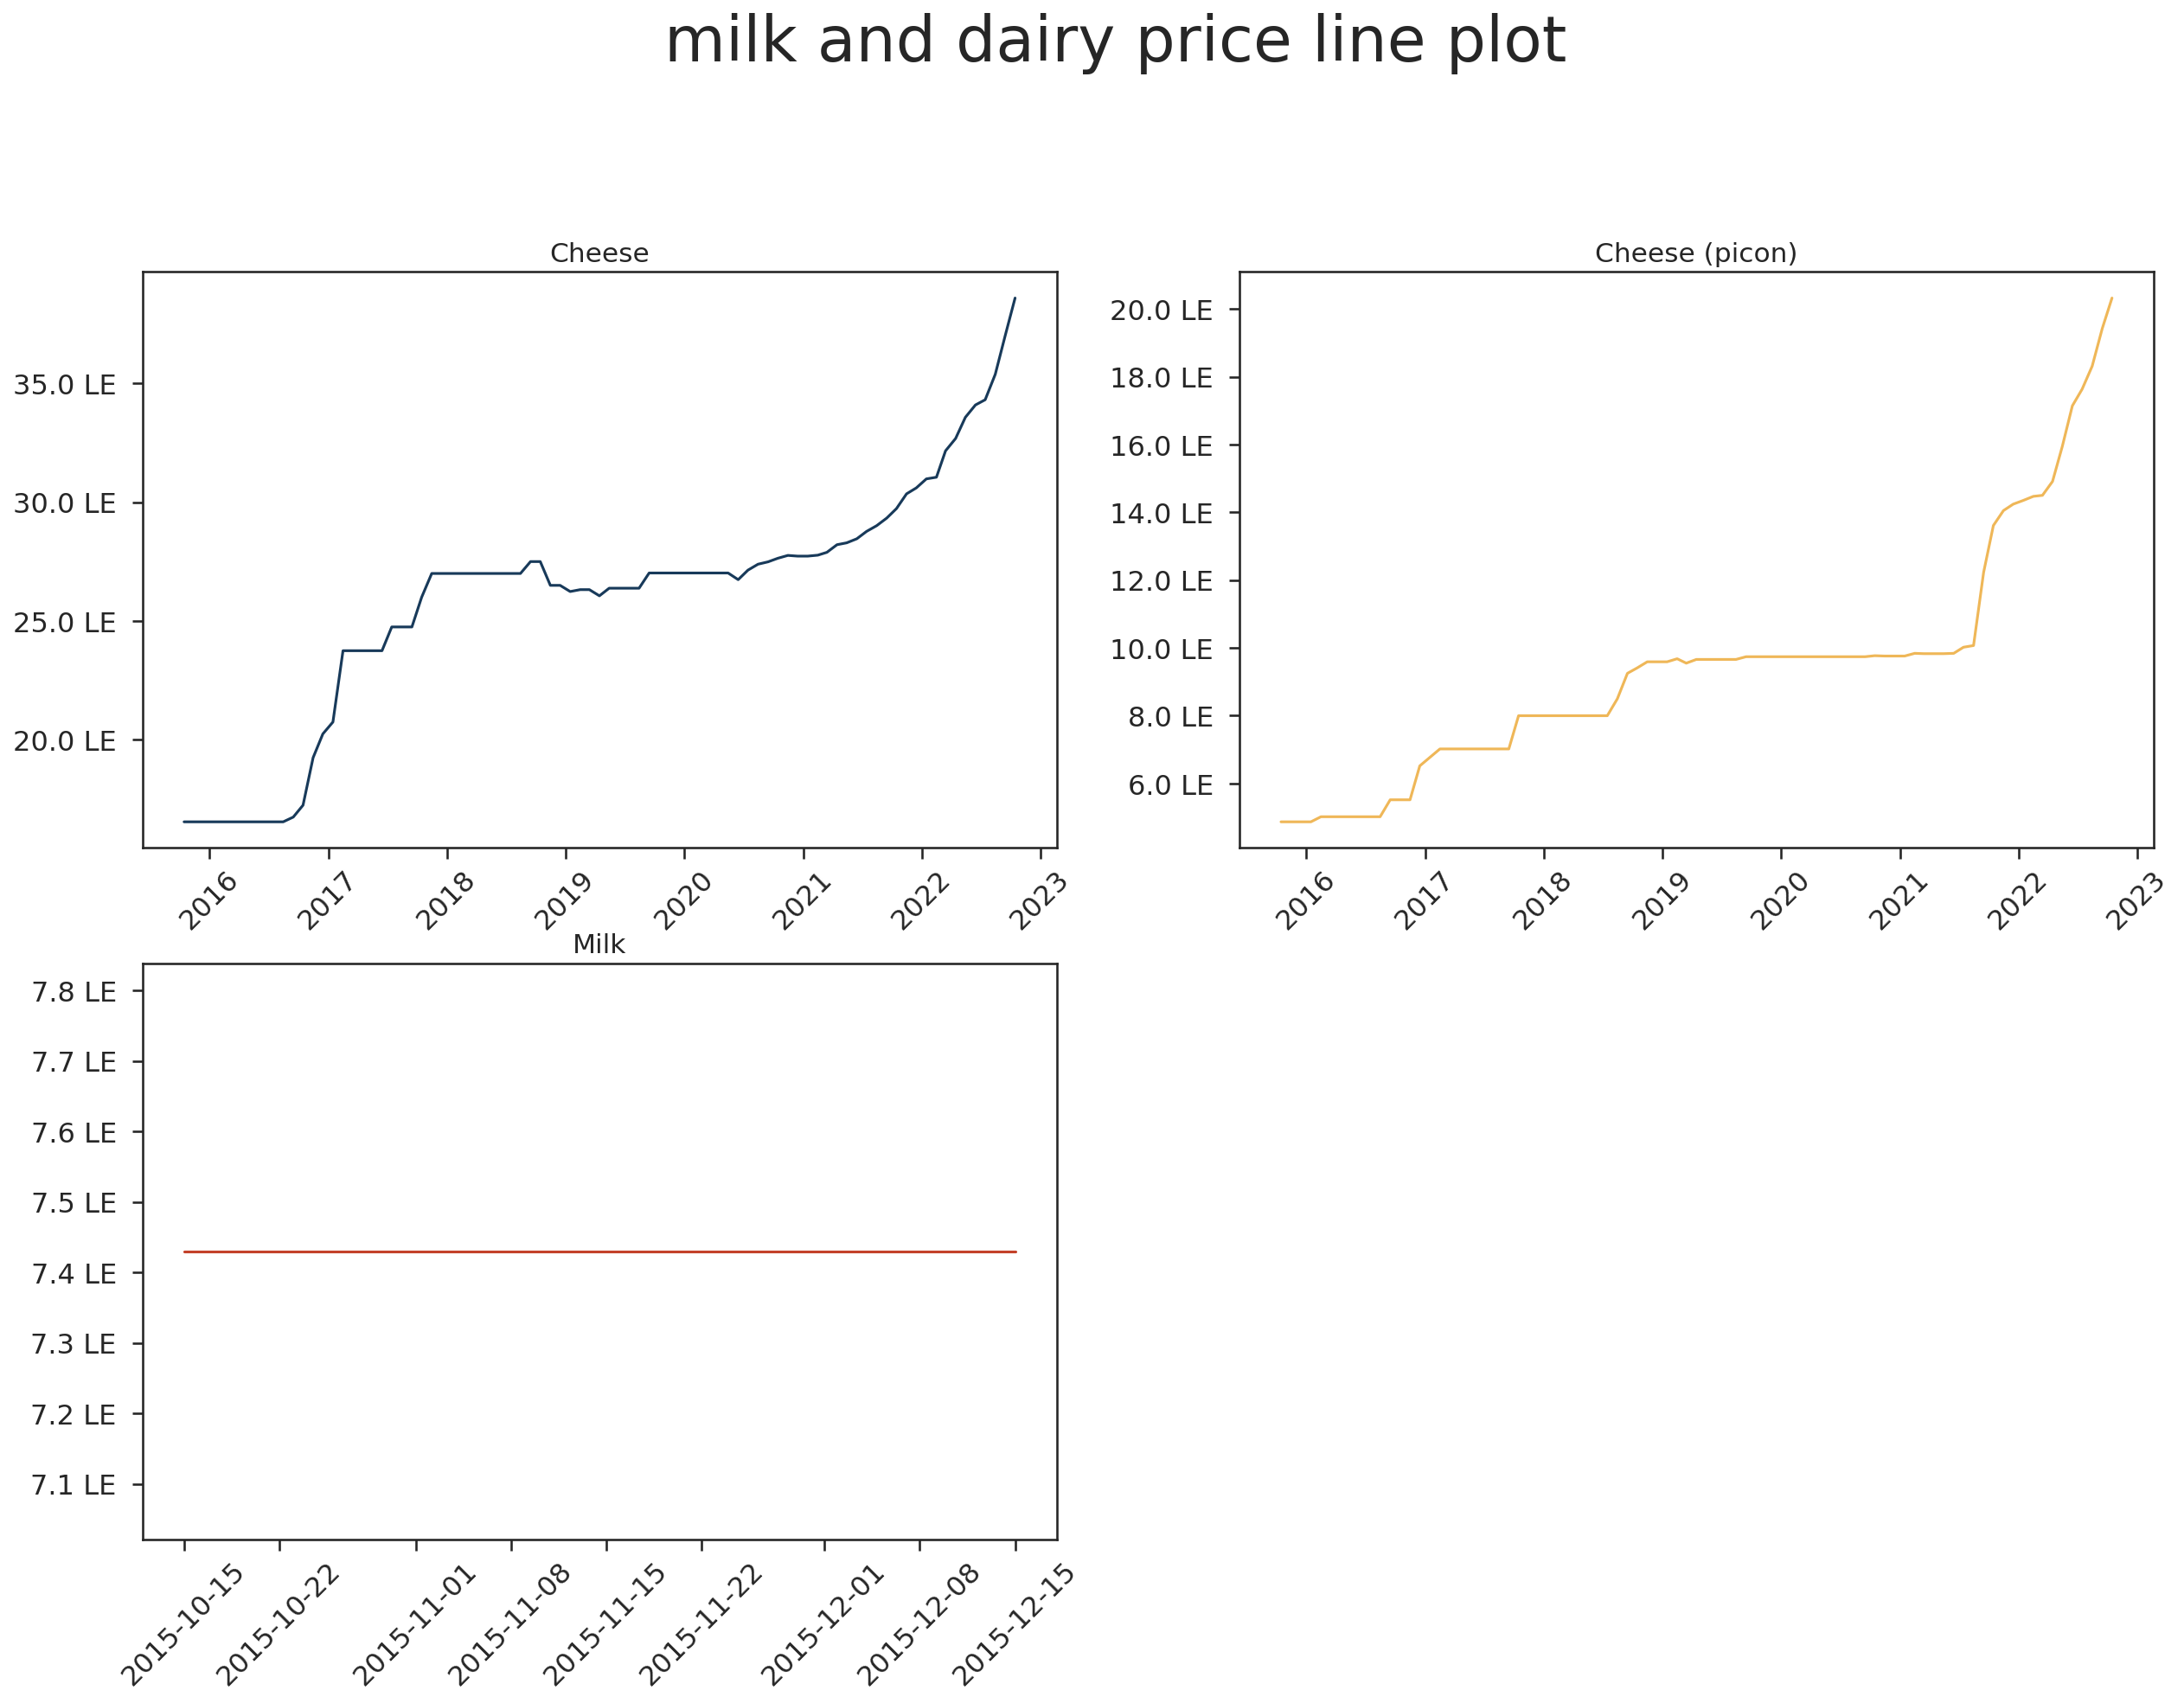

In [ ]:
# create function to plot line plot for each food name in given category in subplots
plot_linechart_foodName_in_category(df,food_category)

## 2. plot regplot chart with average price and years for category

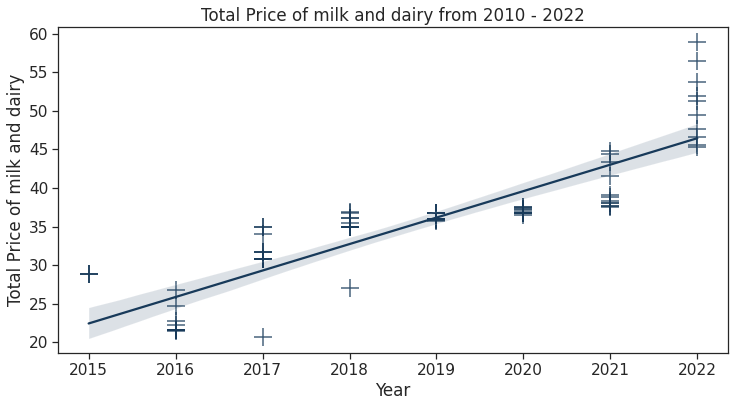

In [ ]:
# create function to plot regplot for mean price of given category

plot_regplot(df,food_category)


## 3. plot bar chart with mean price for category

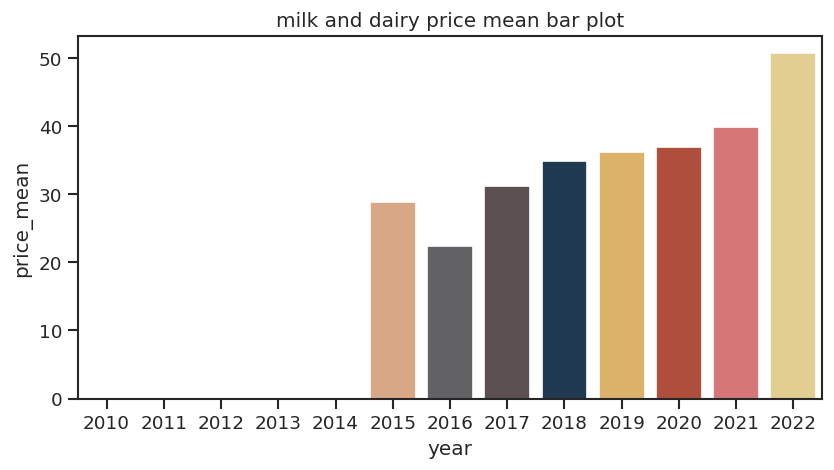

In [ ]:
# plot bar chart for mean price of given category

plot_bar_mean_price(df_years,food_category)

## 4. plot bar chart with min and max price for category

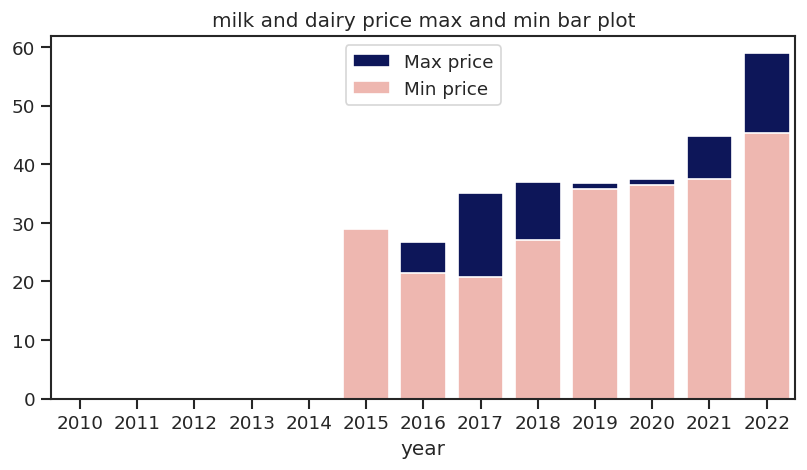

In [ ]:
# plot bar chart with max and min price of given category

plot_bar_min_max_price(df_years,food_category)

## 5. plot bar chart with price change for category

<ipython-input-274-514eb5df1742>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



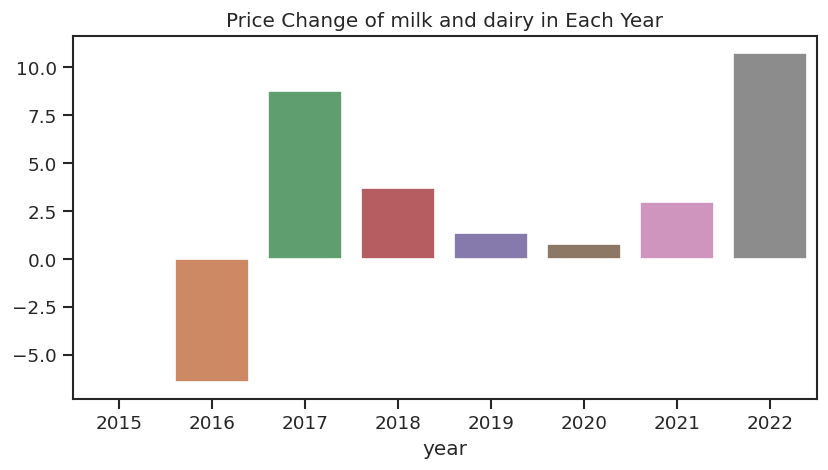

In [ ]:
# # plot price change for each year
# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=cereals_data['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# #axes[0].set_title('Distrbution Of Amount feature in Churn records')

# # convert to function
# def plot_bar_price_change(df,category):
#     sns.set(font_scale=1)
#     sns.set_style("ticks")
#     plt.figure(figsize=(8,4),dpi=120)
#     sns.barplot(x=df['year'],y=df[df['food_category']==category]['price_change']).set(ylabel=None,title=f'Price Change of {category} in Each Year')
#     plt.title(f'{category} price mean bar plot')
#     plt.show()

# plot_bar_price_change(df_years,'cereals and tubers')

# # plot bar chart with price change of given category

# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=df_years['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# plt.show()

plot_bar_price_change(df,food_category)



In [ ]:
# %pip install plotly


## 6. plot time series chart with average price for category

In [ ]:
# Basic Range Slider and Range Selectors Time series with average price for category

plot_time_series_general_category(df,food_category)

## 7. plot time series chart for each food name in category

In [ ]:
# Basic Range Slider and Range Selectors for each food name in category

plot_time_series_food_name(df,food_category)

# 🥥 🥜 **pulses and nuts** 

In [ ]:
df.food_category.unique()

array(['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'meat, fish and eggs',
       'milk and dairy'], dtype=object)

In [ ]:
food_category = 'pulses and nuts'

## 1. plot line chart for all food names in category

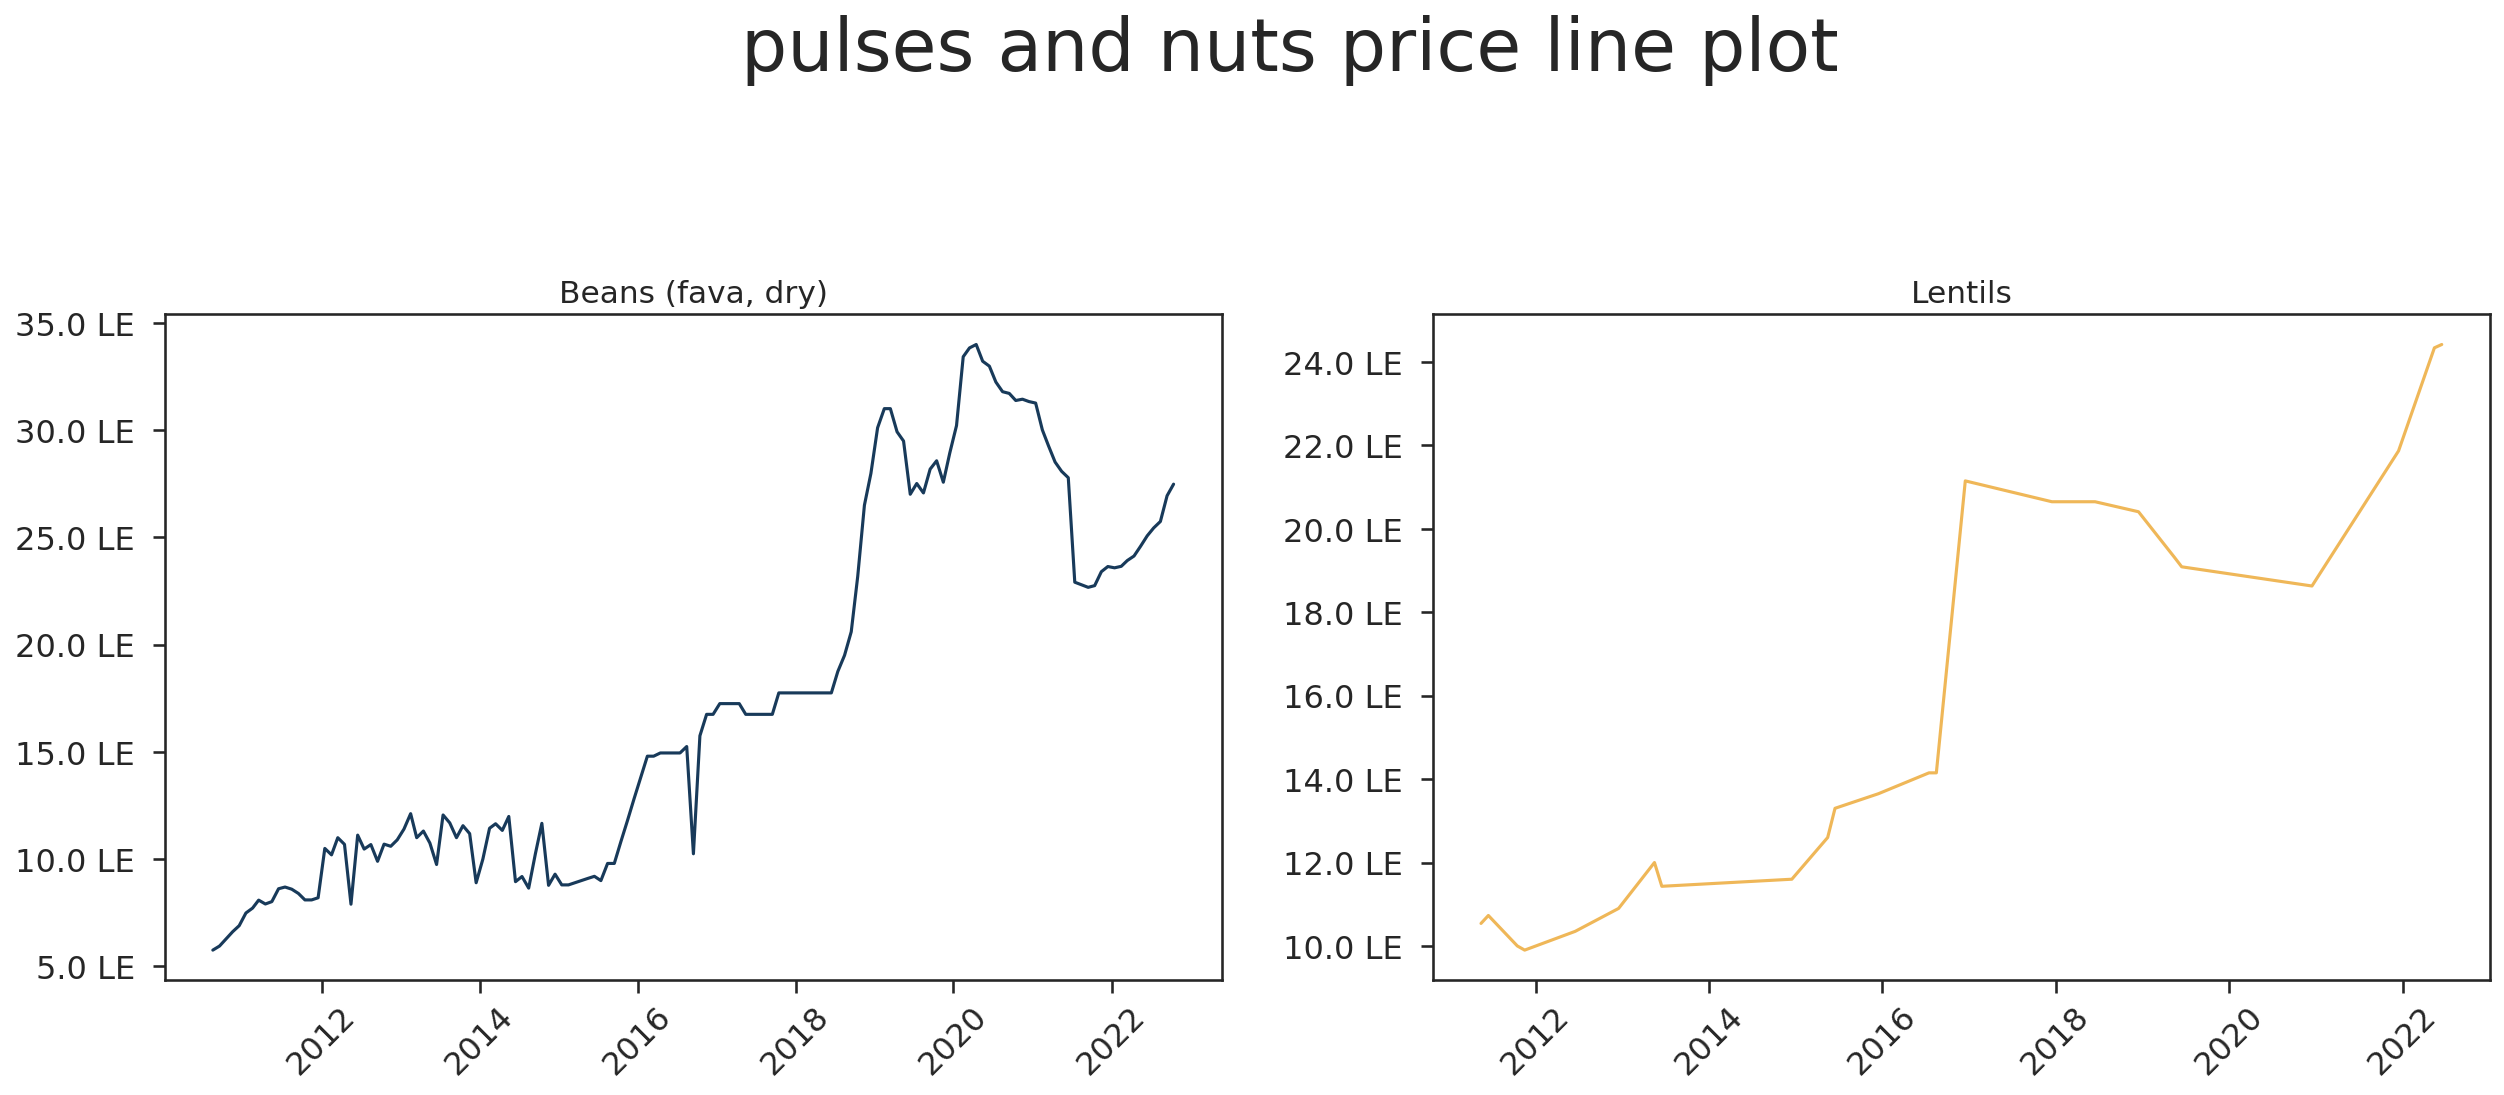

In [ ]:
# create function to plot line plot for each food name in given category in subplots
plot_linechart_foodName_in_category(df,food_category)

## 2. plot regplot chart with average price and years for category

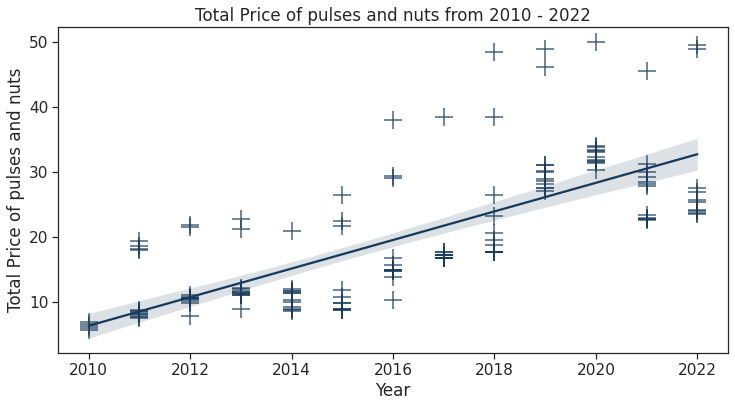

In [ ]:
# create function to plot regplot for mean price of given category

plot_regplot(df,food_category)


## 3. plot bar chart with mean price for category

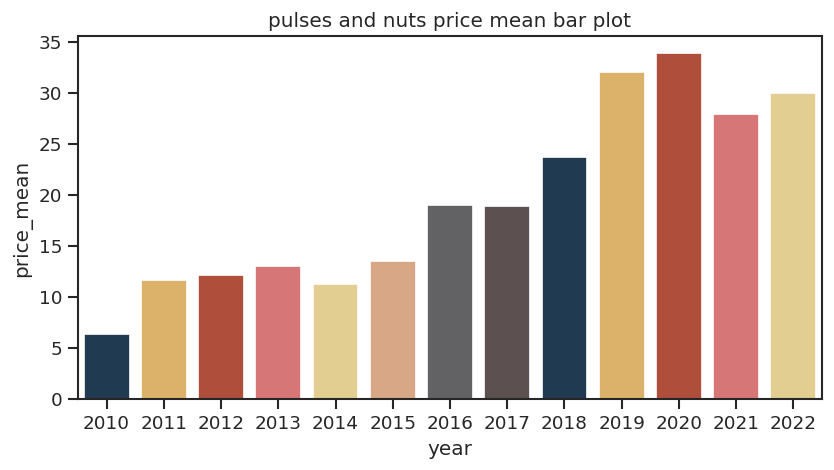

In [ ]:
# plot bar chart for mean price of given category

plot_bar_mean_price(df_years,food_category)

## 4. plot bar chart with min and max price for category

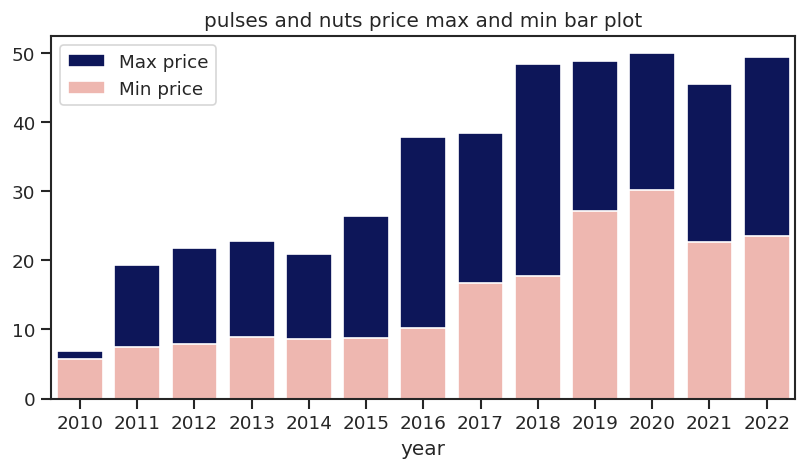

In [ ]:
# plot bar chart with max and min price of given category

plot_bar_min_max_price(df_years,food_category)

## 5. plot bar chart with price change for category

<ipython-input-274-514eb5df1742>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



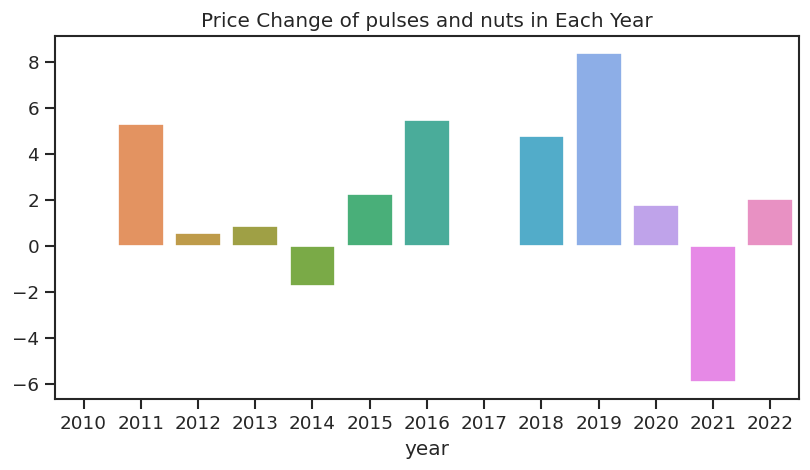

In [ ]:
# # plot price change for each year
# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=cereals_data['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# #axes[0].set_title('Distrbution Of Amount feature in Churn records')

# # convert to function
# def plot_bar_price_change(df,category):
#     sns.set(font_scale=1)
#     sns.set_style("ticks")
#     plt.figure(figsize=(8,4),dpi=120)
#     sns.barplot(x=df['year'],y=df[df['food_category']==category]['price_change']).set(ylabel=None,title=f'Price Change of {category} in Each Year')
#     plt.title(f'{category} price mean bar plot')
#     plt.show()

# plot_bar_price_change(df_years,'cereals and tubers')

# # plot bar chart with price change of given category

# plt.figure(figsize=(8,4),dpi=120)
# sns.set(font_scale=1)
# sns.set_style("ticks")
# sns.barplot(x=df_years['year'],y=df_years['price_change']).set(ylabel=None,title='Price Change of Cereals and Tubers in Each Year')
# plt.show()

plot_bar_price_change(df,food_category)



In [ ]:
# %pip install plotly


## 6. plot time series chart with average price for category

In [ ]:
# Basic Range Slider and Range Selectors Time series with average price for category

plot_time_series_general_category(df,food_category)

## 7. plot time series chart for each food name in category

In [ ]:
# Basic Range Slider and Range Selectors for each food name in category

plot_time_series_food_name(df,food_category)

# 🛒**Total Purchases**

In [ ]:
# print and plot food name in each category
for i in df['food_category'].unique():
    print('food_category: ',i)
    print('food_name: ',df[df['food_category']==i]['food_name'].unique())
    print('--------------------------------------') 
    
df.head()

food_category:  cereals and tubers
food_name:  ['Potatoes' 'Rice' 'Wheat flour' 'Pasta']
--------------------------------------
food_category:  miscellaneous food
food_name:  ['Sugar']
--------------------------------------
food_category:  oil and fats
food_name:  ['Ghee (artificial)' 'Ghee (natural)' 'Oil (maize)' 'Oil (sunflower)'
 'Oil (mixed)']
--------------------------------------
food_category:  pulses and nuts
food_name:  ['Beans (fava, dry)' 'Lentils']
--------------------------------------
food_category:  vegetables and fruits
food_name:  ['Garlic' 'Tomatoes' 'Onions (red)' 'Onions (white)']
--------------------------------------
food_category:  meat, fish and eggs
food_name:  ['Meat (beef)' 'Meat (chicken, frozen)' 'Eggs' 'Fish (tilapia)']
--------------------------------------
food_category:  milk and dairy
food_name:  ['Cheese' 'Cheese (picon)' 'Milk']
--------------------------------------


,date,food_category,food_name,unit,EGP_price,USD_price,year
0,2010-08-15,cereals and tubers,Potatoes,KG,1.81,0.3178,2010
1,2010-08-15,cereals and tubers,Rice,KG,3.98,0.6992,2010
2,2010-08-15,cereals and tubers,Wheat flour,KG,3.44,0.6044,2010
3,2010-08-15,miscellaneous food,Sugar,KG,4.28,0.7524,2010
4,2010-08-15,oil and fats,Ghee (artificial),KG,9.82,1.7263,2010


In [ ]:
df[(df['year']==2015) & (df['food_name']=='Rice')]['EGP_price'].mean()#[0]#*basket['Rice']

4.475454545454546

In [ ]:
# create Basket of food names
# Add items to the basket and make sure that the food name is in the dataset and in all years

# supermarket basket for one week
small_basket = { 
    'Rice': 2, 'Pasta':2 , 
    'Sugar': 1,
    'Meat (beef)' : 1, 'Meat (chicken, frozen)':2,  'Eggs':10,'Fish (tilapia)':2,
    'Ghee (natural)': 1, 'Oil (maize)':1, 
    'Garlic':1, 'Tomatoes':4 , 'Onions (red)':2,
    'Beans (fava, dry)': 1, 'Lentils':1
        }

larg_basket = { 
    'Rice': 6, 'Pasta':8 , 'Wheat flour':2, 'Potatoes':3,
    'Sugar': 4,
    'Meat (beef)' : 4, 'Meat (chicken, frozen)':8,  'Eggs':30,'Fish (tilapia)':6,
    'Ghee (natural)': 3, 'Oil (maize)':5,
    'Garlic':3, 'Tomatoes':20 , 'Onions (red)':10,
    'Beans (fava, dry)': 3, 'Lentils':2,
    'Cheese':2, 'Cheese (picon)':3, 'Milk':10
        }
    
# create function to calculate total price of basket for each year and save it in new dataframe

def calculate_total_price(df,basket):
    df_total_price = pd.DataFrame(columns=['year','total_price'])
    # add years to dataframe
    df_total_price['year'] = df['year'].unique()
    for year in df['year'].unique():
        total_price = 0

        for food_name in basket:
            # print(food_name)
            # print(year)
            try :
                # print(df[(df['year']==year) & (df['food_name']==food_name)]['EGP_price'].values[0])
                if len(df[(df['year']==year) & (df['food_name']==food_name)]['EGP_price']) >0:
                    total_price += df[(df['year']==year) & (df['food_name']==food_name)]['EGP_price'].mean()*basket[food_name]
                else: fvgfrgr
            except:
                #print('not found')
                # add mean price of food_name in all years
                total_price += df[df['food_name']==food_name]['EGP_price'].mean()*basket[food_name]
        #add total price of basket for each year df_total_price
        df_total_price.loc[df_total_price['year']==year,'total_price'] = total_price
    return df_total_price

df_small_basket = calculate_total_price(df,small_basket)

df_larg_basket = calculate_total_price(df,larg_basket)
#print(df_small_basket)
#print(df_larg_basket)


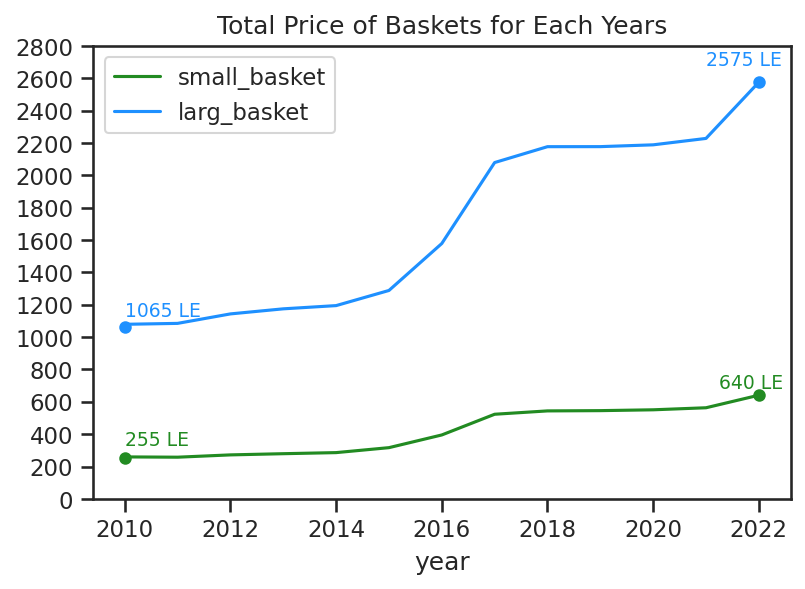

In [ ]:
# plot line chart for total price of basket for each year

plt.figure(figsize=(6,4),dpi=150)
sns.set(font_scale=1)
sns.set_style("ticks")
sns.lineplot(x=df_small_basket['year'],y=df_small_basket['total_price'],label = 'small_basket',color='forestgreen').set(ylabel=None,title='Total Price of Baskets for Each Years')
sns.lineplot(x=df_larg_basket['year'],y=df_larg_basket['total_price'],label = 'larg_basket',color='dodgerblue').set(ylabel=None,title='Total Price of Baskets for Each Years')
# edit xticks
plt.yticks(np.arange(0, 5000, 200))
plt.ylim(0,2800)
# add value to last point
# color same as line
color = 'darkorange'

plt.text(2021, 2680, '2575 LE', fontsize=9, color='dodgerblue')
plt.text(2010, 1130, '1065 LE', fontsize=9, color='dodgerblue')
plt.text(2021.25, 680, '640 LE', fontsize=9, color='forestgreen')
plt.text(2010, 330, '255 LE', fontsize=9, color='forestgreen')

# add marker to last point and first point
plt.plot(2022, 2575, marker='o', markersize=5, color='dodgerblue')
plt.plot(2010, 1065, marker='o', markersize=5, color='dodgerblue')
plt.plot(2022, 640, marker='o', markersize=5, color='forestgreen')
plt.plot(2010, 255, marker='o', markersize=5, color='forestgreen')
plt.show()

In [ ]:
df_larg_basket

,year,total_price
0,2010,1079.003711
1,2011,1084.73556
2,2012,1143.292744
3,2013,1174.663916
4,2014,1194.580028
5,2015,1288.18671
6,2016,1578.406869
7,2017,2078.816818
8,2018,2176.916234
9,2019,2177.216389
